## Sentiment Analysis {-}
### Part 1 - Literature Review {-}

Sentiment analysis refers to the analysis of a text corpus such as online reviews, social media platforms or news articles to determine the general attitude toward a product or topic (Pahwa et al., 2018). Machine learning-based approaches typically use algorithms such as neural networks, decision trees and support vector machines to determine sentiment, whereas lexicon-based approaches rely on the use of dictionary of words or terms with attached sentiment scores or ratings to achieve the same end (D'Andrea et al., 2015).

A brief perusal of the literature indicated that neither approach has consistently outperformed the other. For example, (Augustyniak et al., (2014) and Kolchyna et al. (2015)) both found that a machine learning classifier performed better, whereas Dhaoui et al. (2017) concluded that the two approaches performed similarly well on social media data and Hutto and Gilbert (2015) concluded that the VADER lexicon performed at least as well as a number of different machine learning algorithms across four different text corpora[^1].

There have also been a number of studies on the application of sentiment analysis to the news domain. For example, Godbole et al. (2007) built a large-scale system using path analysis for news and blog entities, Taj et al. (2019) used a lexicon-based approach to classify 2,225 BBC news articles across five different categories and Souma et al. (2019) investigated whether historical news sentiment based on financial market performance could predict financial news article sentiment.

News article headlines and the brief blurbs that come with them are designed to get people to read the rest of the article (Goins, n.d.). They are also often good or bad (often appearing to be more bad than good (Stafford, 2014)), but rarely neutral. Furthermore, whilst sentiment analysis can never reflect the actual emotions conveyed by the text as this depends on the reader and the context, it can help determine the strength and type of emotion present in text segments. Therefore, sentiment analysis makes an important contribution to an investigation to the extent to which news headlines and summaries are sensationalised.  

[^1]: Including a New York Times dataset.  

### Part 2 – Text-Specific Pre-Processing {-}

Data pre-processing is an important step of any machine learning pipeline, and failure to conduct this step can adversely impact on the robustness of subsequent analysis. However, sentiment analysis with a lexicon-based approach usually requires little to no customised text-specific pre-processing given the comparison of text segments to a reference dictionary and any required transformations of that nature are dealt with by the algorithm. Therefore, the headline and summary columns were input into the two sentiment analysers without any further pre-processing applied.  

### Part 3 – Preliminary Analysis and Performance Assessment {-}

The sentiment analysis focused on the main headline and summary columns, and used the popular TextBlob and VADER packages. VADER is a rule-based lexicon that was specifically designed for use in social media contexts, but could be applied to other domains (Hutto & Gilbert, 2015), and the default setting of TextBlob focussed on the types of adjectives used in text segments to determine sentiment (Loria, 2020).

However, it was interesting to first take a look at the types of words used in the headlines and summaries (Figure 1) to try and obtain some preliminary insight into the type of sentiment that could be expected. 
 
```Figure 1: Wordclouds for most common words used in BBC News headlines and summaries```  

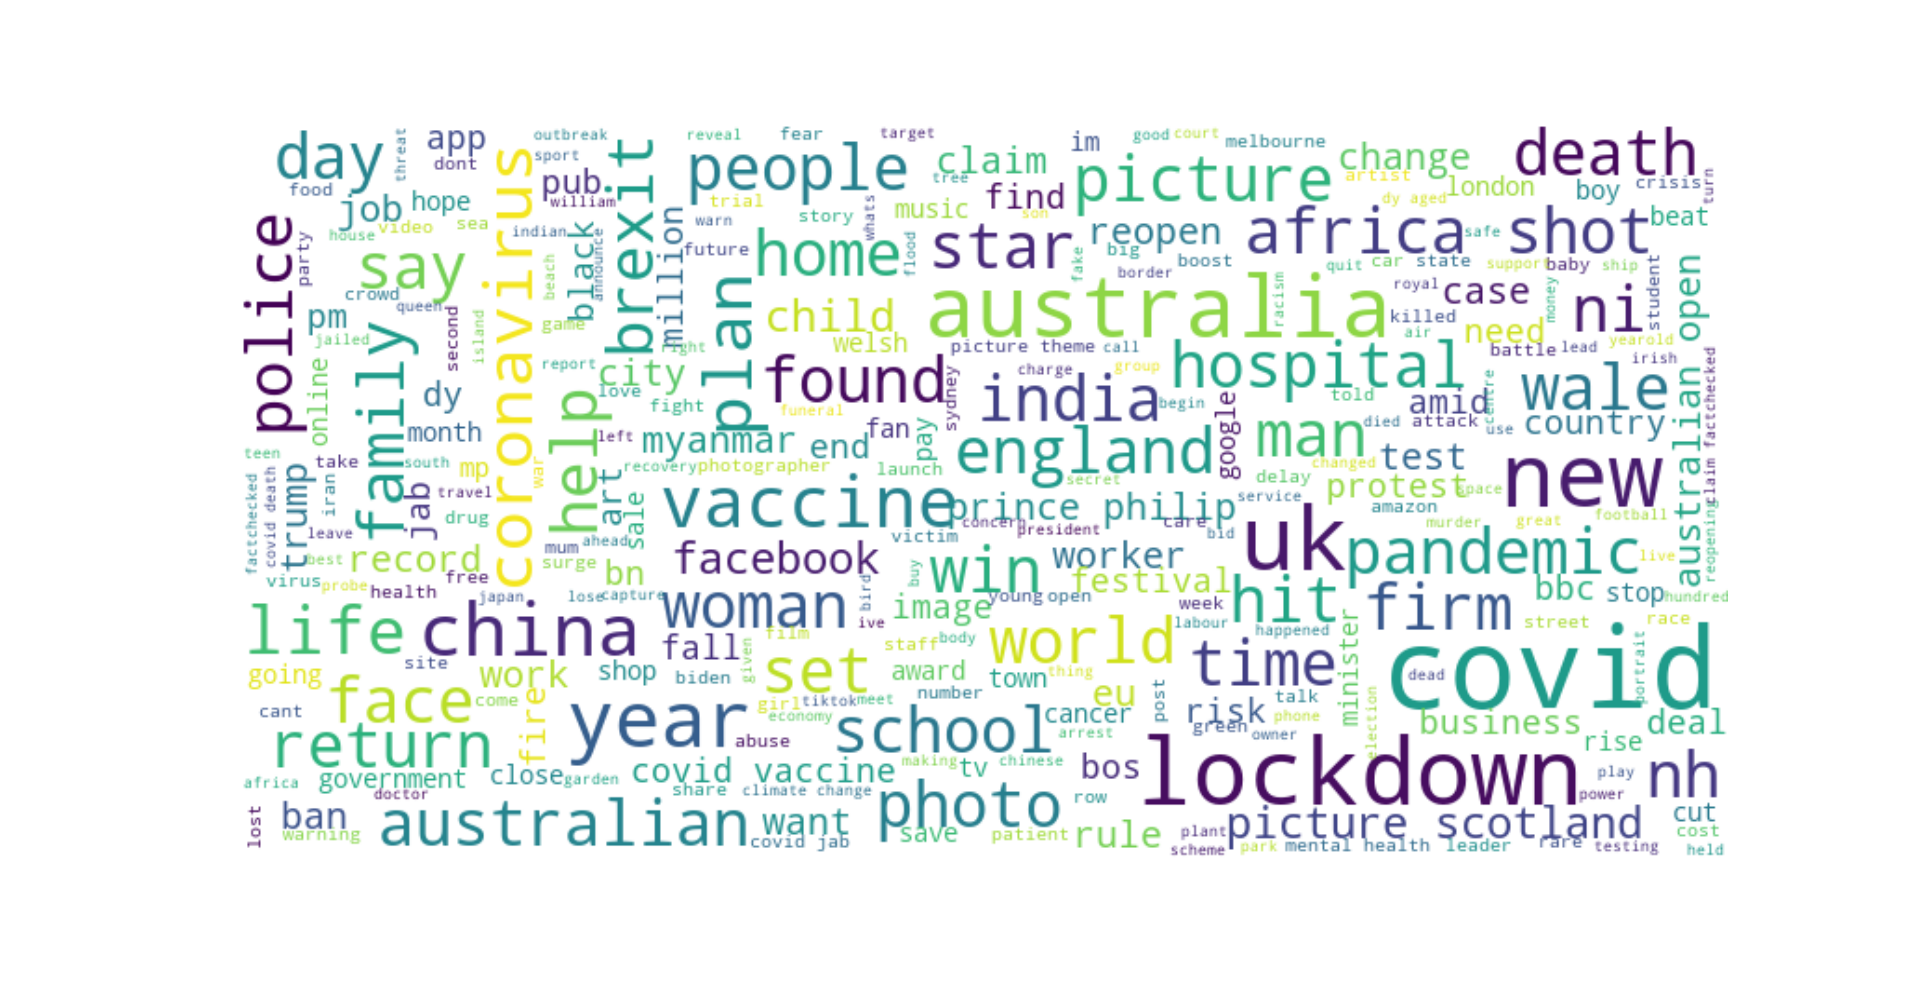

In [2]:
from IPython.display import Image
Image('Doc3a-Image1.png', width='75%')

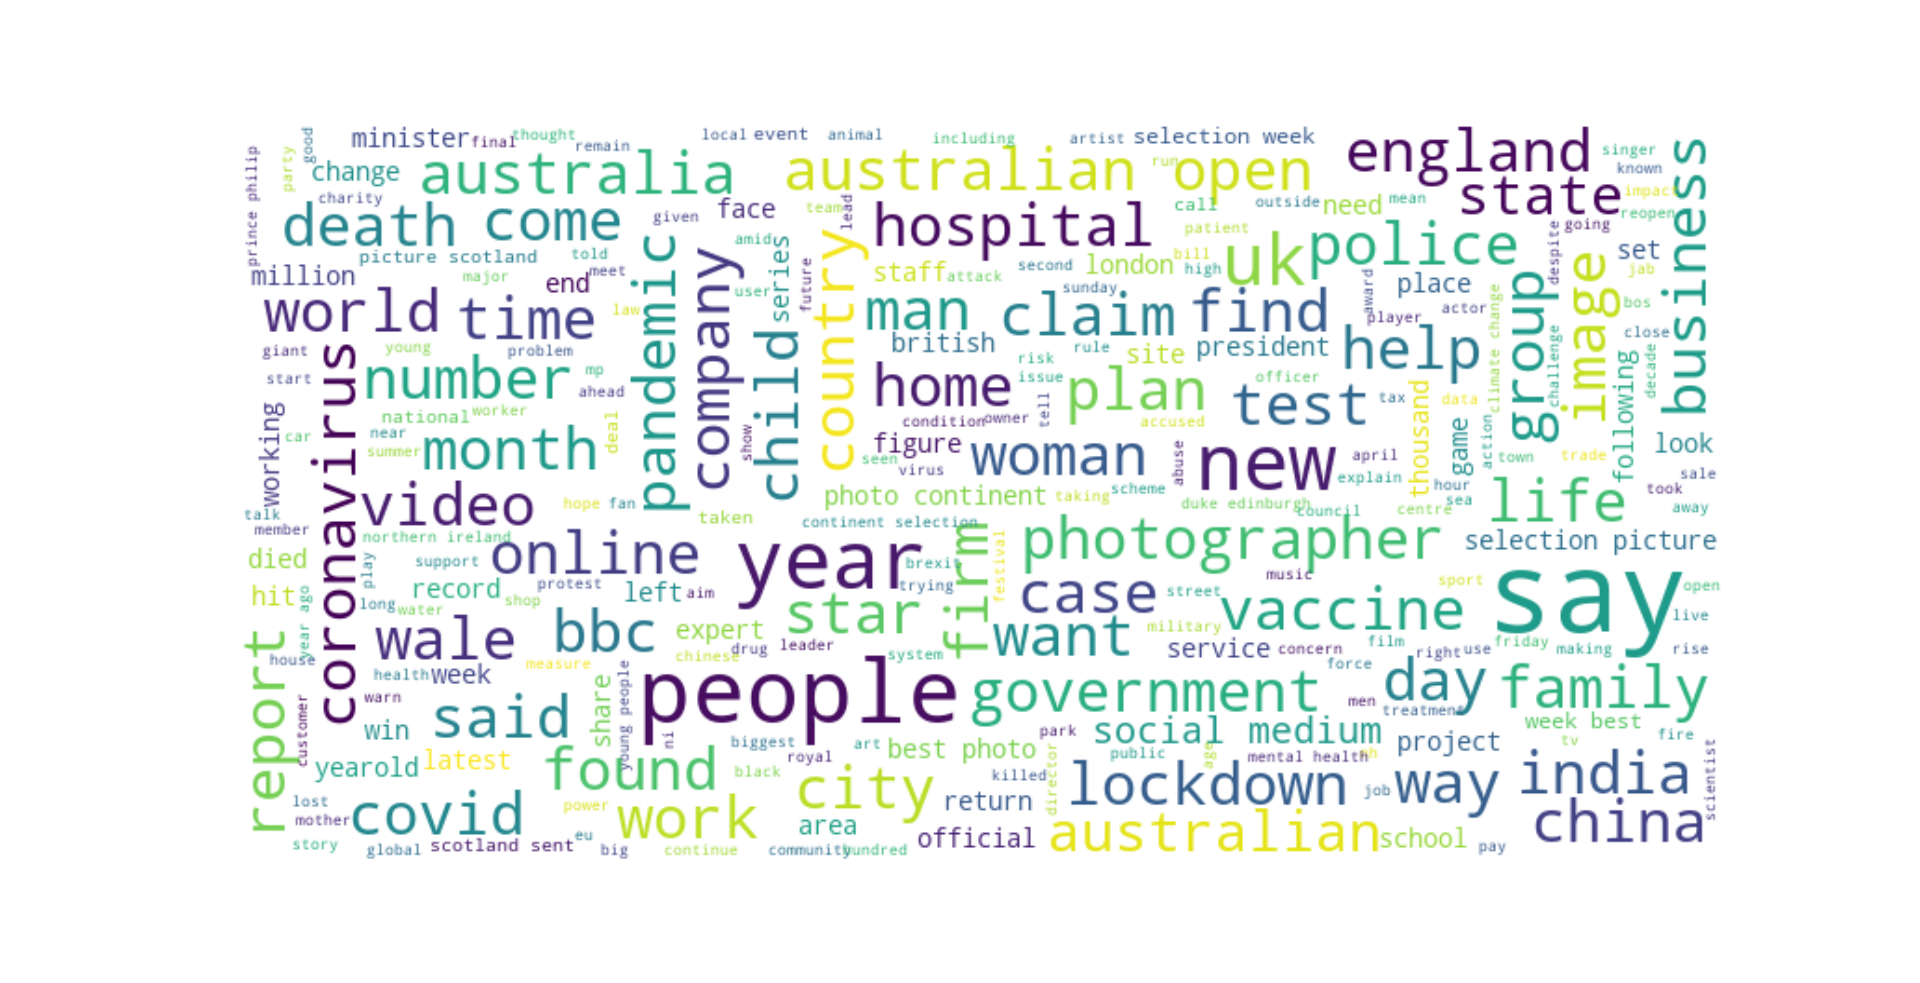

In [5]:
Image('Doc3a-Image2.png', width='75%')

A comparison of overall sentiment indicated that TextBlob found the sentiment of the headlines and summaries to be slightly positive, whereas VADER found them to be slightly negative (Figure 2): 

```Figure 2: Comparison of overall sentiment by average sentiment score (TextBlob LHS, VADER RHS)```  

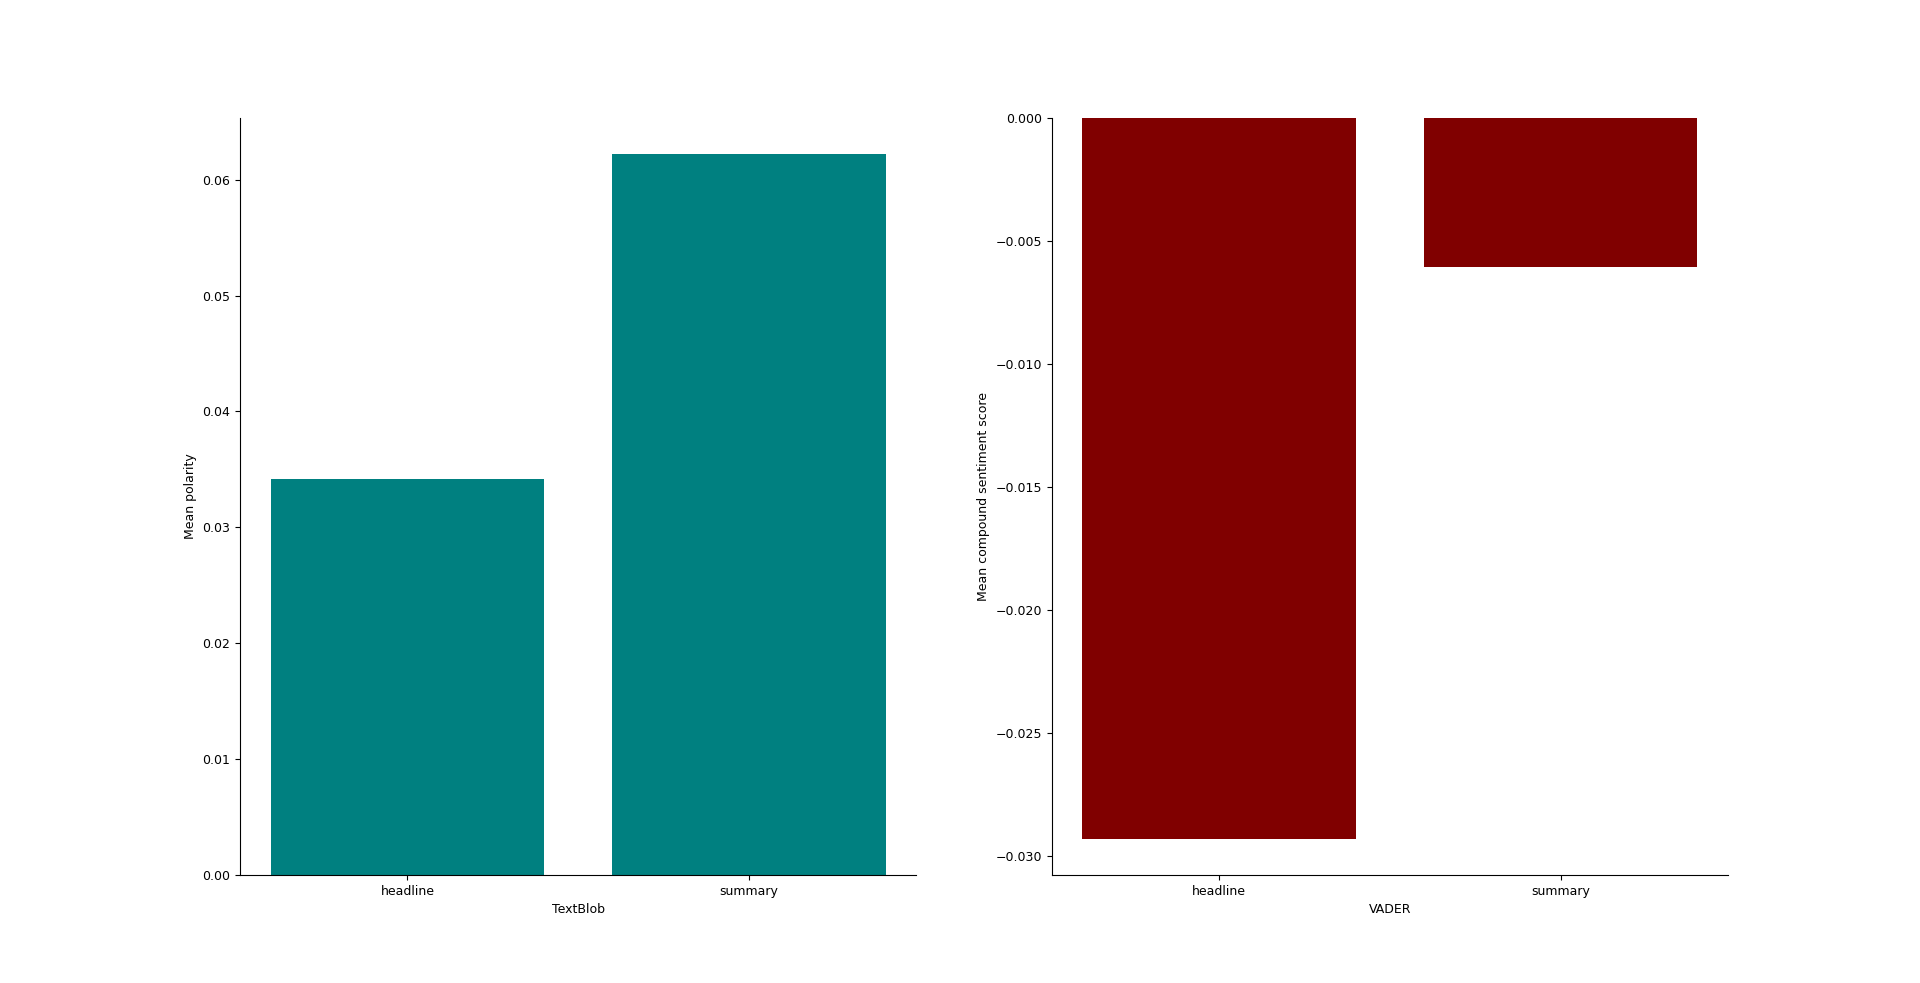

In [6]:
Image('Doc3a-Image3.png', width='75%')

The breakdown of average sentiment score by webpage (Figure 3) indicated that TextBlob and VADER largely agreed on the average sentiment of the different webpages with respect to both type and intensity. 

```Figure 3: Comparison of sentiment by webpage (TextBlob LHS, VADER RHS)```  

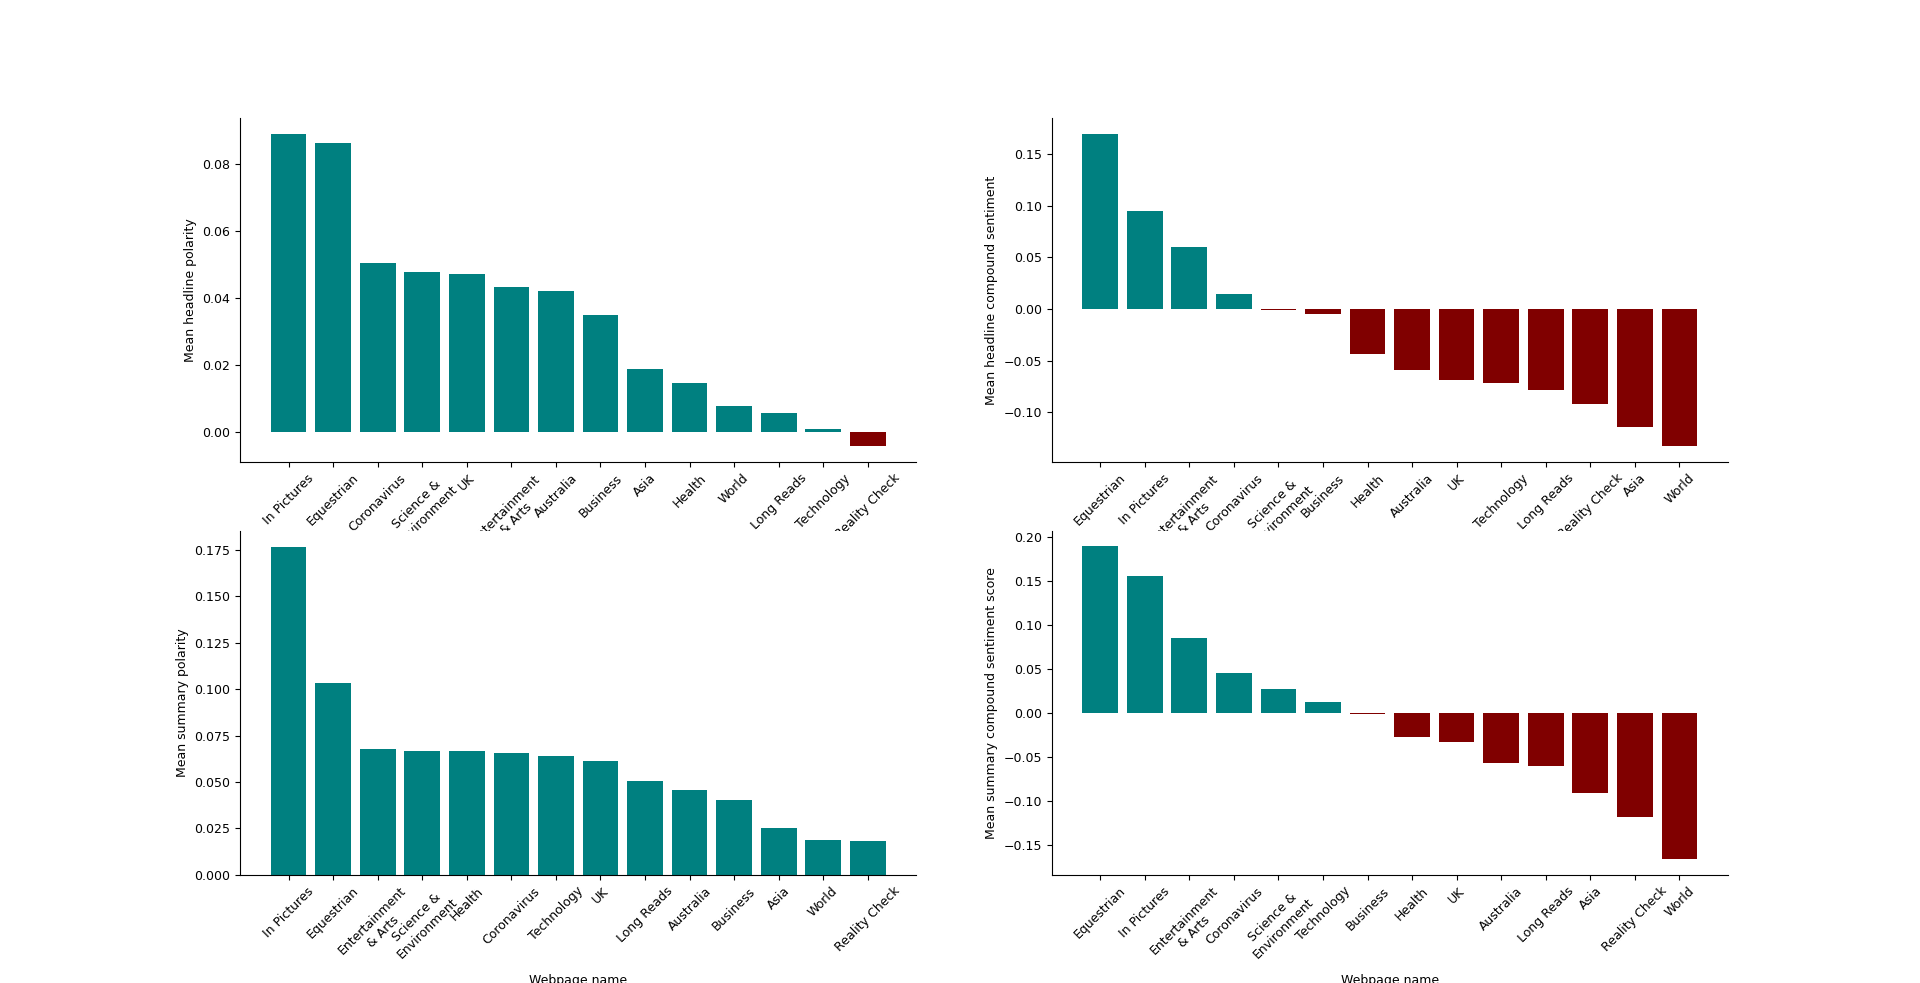

In [7]:
Image('Doc3a-Image4.png', width='100%')

However, the average breakdown of sentiment score by the top 30 categories by number of stories indicated that VADER considered far more of the categories to contain negative sentiment than TextBlob, and also rated the sentiment with higher intensity on average (Figure 4). This significant difference is worth future investigation to determine why the two algorithms were performing so differently on the same text. 

```Figure 4: Comparison of sentiment by the top-30 categories (by number of stories; TextBlob LHS, VADER RHS)```  

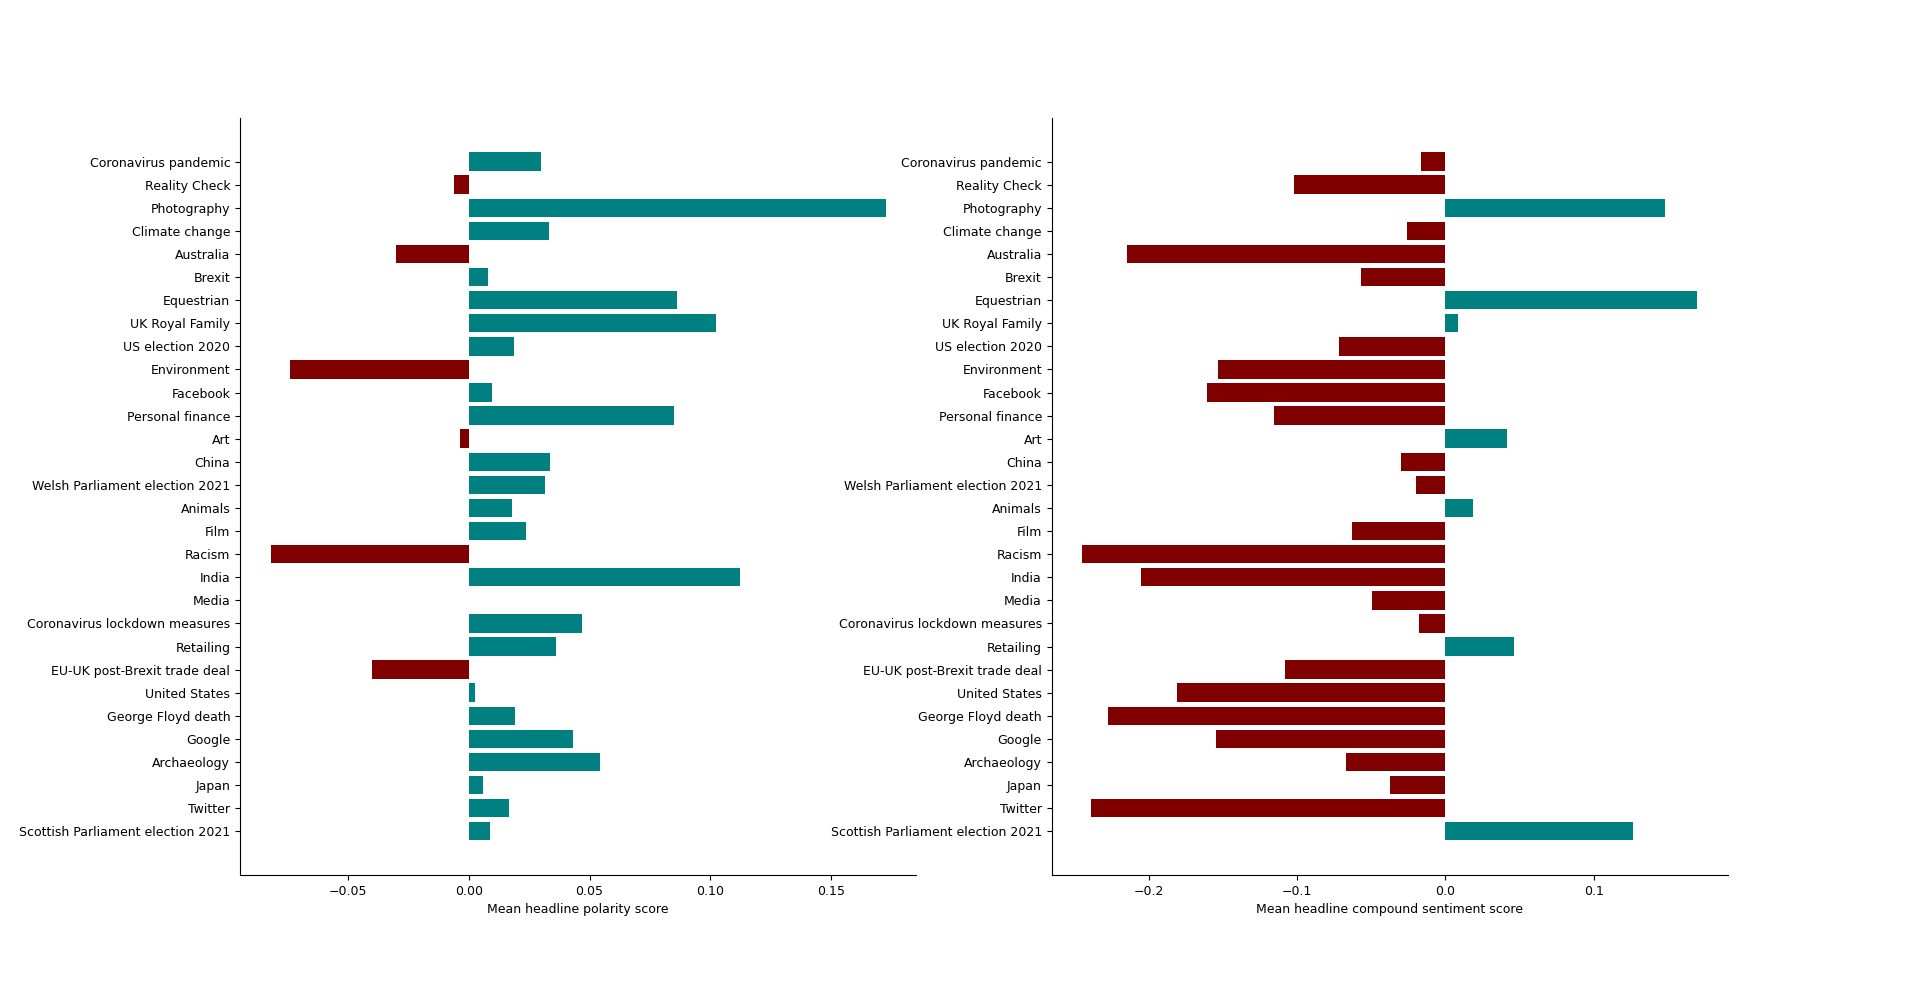

In [8]:
Image('Doc3a-Image5.png', width='100%')

The final comparison looked at the most positive and negative categories for each algorithm[^2] (Figure 5). There were commonalities to both algorithms for both comparison, which also indicated an underlying robustness to the results. Furthermore, whilst deeper investigation into the text would reveal more insights about why the algorithms were rating certain categories more negatively or more positively on average, a general perusal of the categories indicated that the placement of the categories was reasonable and therefore strengthened the previous conclusion regarding the reliability of the results. 

[^2]: For categories including ten or more stories.

```Figure 5: Comparison of the most-negative (top) and most-negative (bottom) categories by sentiment score (TextBlob LHS, VADER RHS)``` 

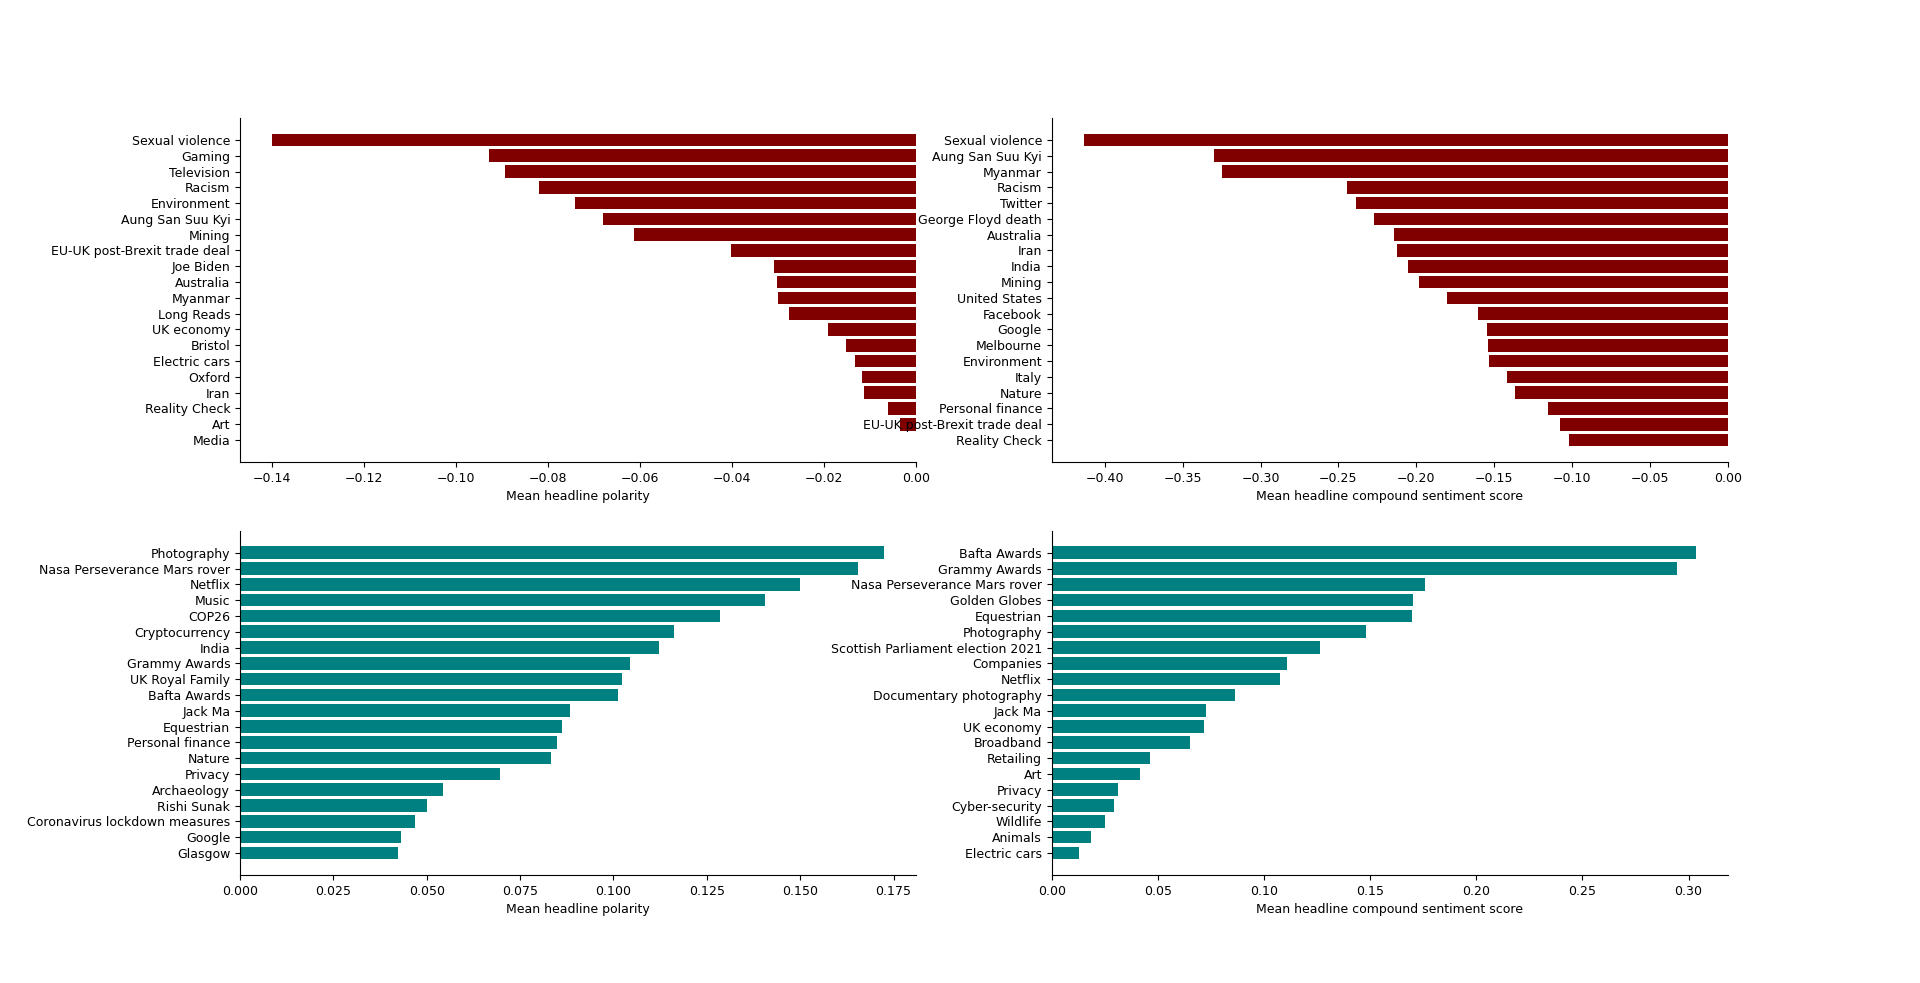

In [14]:
Image('Doc3a-Image6.png', width='100%')

### Part 4 - Code  {-}

The code for this section is in Appendix A.

## Topic Modelling {-}
### Part 1 - Literature Review  {-}

Topic modelling is an unsupervised machine learning technique that attempts to discover the themes underpinning a text corpus, and as a result, has a number of different applications, including document clustering, text organisation, information retrieval and feature selection.

Two of the most prominent algorithms are Latent Dirichlet Allocation (LDA), which takes a probabilistic approach and Non-Negative Matrix Factorisation (NMF), which uses a linear algebraic approach (Mifrah & Benlahmar, 2020).

In brief, NMF decomposes a document-term matrix into two non-negative component matrices, which contain the topics found and the topic coefficients (weights):

$$ {A}_{m \times k} \, \approx \, {W}_{m \times i} \, \times \, {H}_{i \times k} $$

Where the matrices W and H can be found by solving an optimisation problem that is usually defined with the Frobenius norm:

$$ \min_{W \ge 0, H \ge 0} f(W,H) \, = \, \| A \, - \, WH \|^2_F $$

(Kuang et al., 2015).

Whilst LDA is perhaps the more popular of the two, there are some that have found NMF to produce better results (for example,  Chen et al. (2019), O'Callaghan et al. (2015), Blad and Svensson (2020)). In addition, (Klos (2020)) concluded that NMF was a better option for shorter texts as it calculated how well each document fit a topic rather than assuming each document contained multiple topics.

Similar to the previous sentiment analysis, the application of a topic modelling algorithm would make an important contribution to determining the extent to which news sensationalism was present. This is because it would enable deeper investigation of specific subsets of the corpus by the discovered topics or by focusing on those containing strong negative emotions. 

### Part 2 - Text-Specific Pre-Processing {-}

Unlike sentiment analysis, the robustness and quality of the results produced by a topic modelling algorithm such as NMF is highly dependent on the form and contents of the input data. Therefore, the headline and summary columns were removed of stopwords, punctuation and digits, lemmatised and tokenised into individual words. Stemming was not applied as this can result in non-English word stems and therefore make subsequent labelling of output topics more difficult.

A TF-IDF vectoriser was used to transform the text corpus into a suitable bag-of-words representation to account for the variability in string length of the different document headlines and summaries.

### Part 3 - Hyperparameter Specification and Justification {-}

The scikit-learn implementation of NMF was used, which meant that the values of a number of key hyperparameters had to be considered (Table 1): 

```Table 1: NMF hyperparameter selection``` 



The values of these hyperparameters were specified using a customised grid search based on the model coherence score, using a model with default values as a measure of baseline performance (for example Figure 6). The TC-W2V metric will be discussed further in the next section. The values in the customised hyperparameter grid were based on what was found in the sci-kit-learn documentation and related literature.

```Figure 6: Grid search plot for story summaries``` 

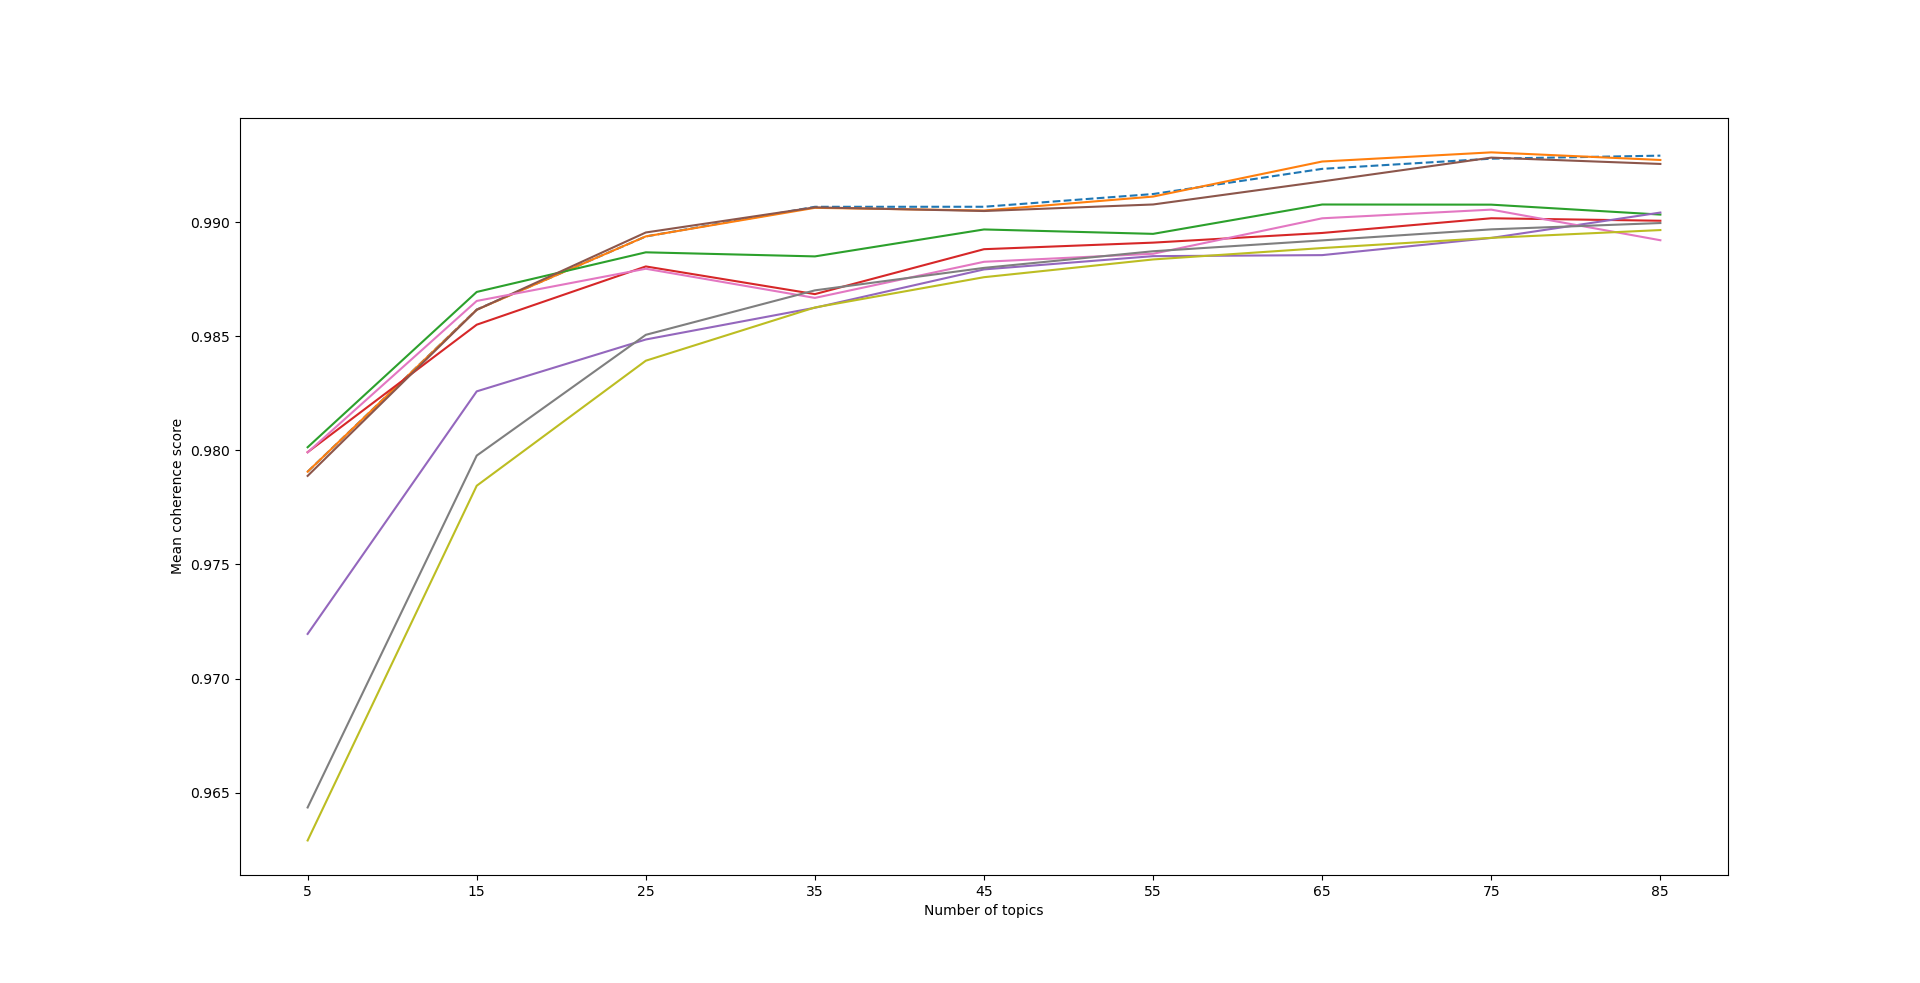

In [6]:
Image('Doc3b-Image1.png', width='75%')

### Part 4 - Preliminary Analysis and Performance Assessment {-}



The topic modelling analysis also focussed on the main headline and summary columns. However, the first step taken was to take another look at the words used in the category column to gain some preliminary insight and indications about the types of topics that might be expected from this task (Figure 6). Unsurprisingly, the most prominent categories were the *coronavirus pandemic* and *reality check*.

```Figure 6: Wordcloud of all BBC News story categories```

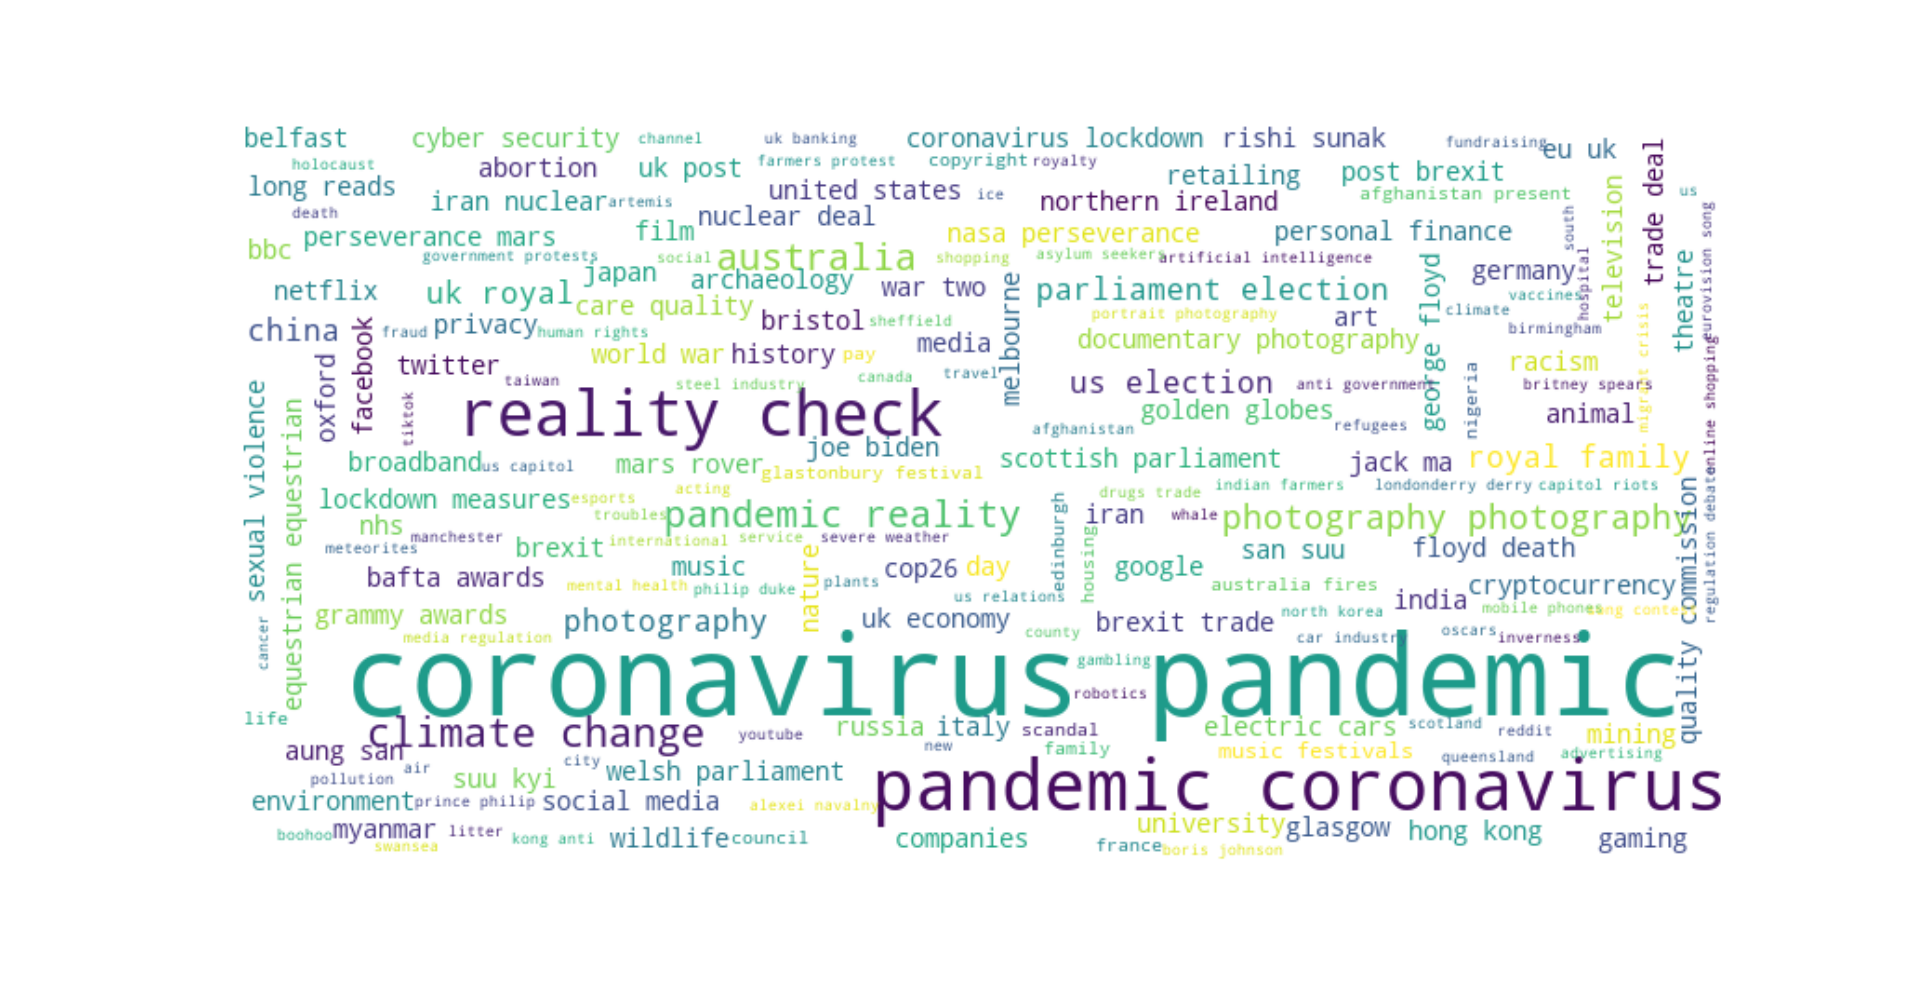

In [7]:
Image('Doc3b-Image2.png', width='75%')

As topic modelling is an unsupervised learning method, the application of traditional machine learning approaches to the analysis of results, hyperparameter specification and performance assessment were going to be challenging if not impossible. However, it was determined that a variation on O'Callaghan's (2015) TC-W2V metric could be used to quantitatively indicate the appropriate number of topics and assist in the specification of key hyperparameters. The TC-W2V metric measured how semantically close words were that describe the same topic. For this project, it was defined as the average similarity between all pairs of top-20 words describing a topic (where a score of zero indicated zero similarity and a score of one indicated perfect similarity (O'Callaghan, 2015).

The coherence score indicated that a reasonable number of topics for the dataset was 70 (Figure 7), and whilst it appeared to produce reasonably coherent topics that could be labelled using a combination of the topic keywords (Figure 8)  and the pre-processed text summaries to provide additional context, closer inspection also revealed that some topics were repeated more than once. This suggested that a smaller number of topics could possibly be used without a significant drop in the average coherence score.

```Figure 7: Average coherence score by number of components (topics) for the story summaries```

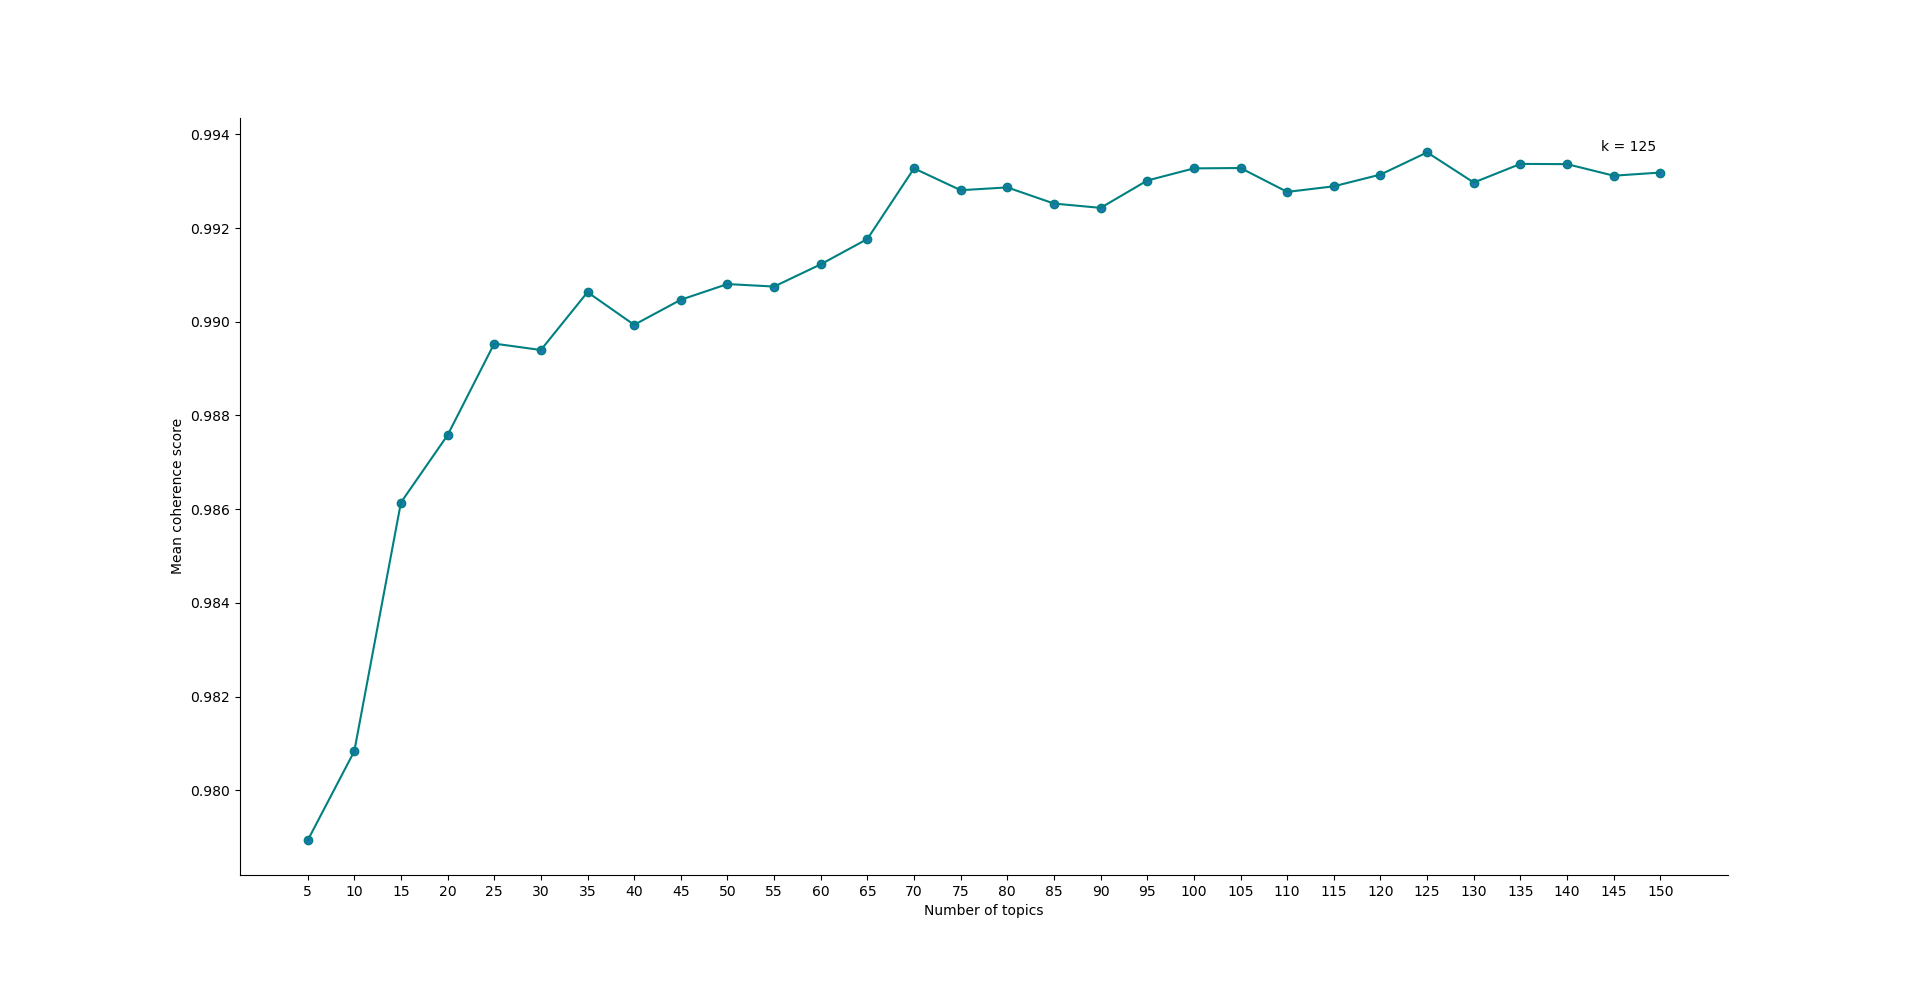

In [8]:
Image('Doc3b-Image3.png', width='75%')

```Figure 8: Top ten keywords for the first ten summary topics produced by the NMF model```

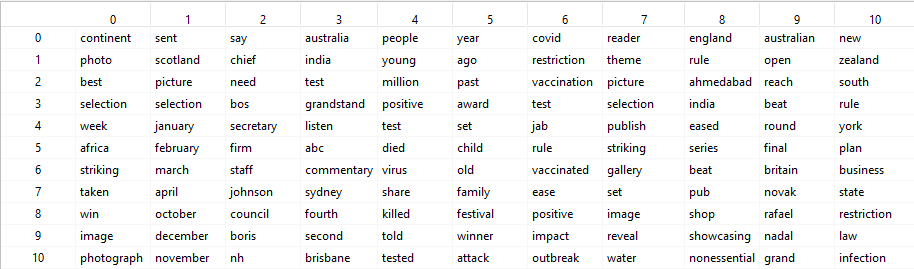

In [6]:
Image('Doc3b-Image3.png', width='75%')

The first ten topics suggested by the NMF algorithm suggested the following labels/descriptors:

| Topic Number | Descriptor/Label |
| :----------- | :--------------- |
| 1 | Photography |
| 2 | Photography months |
| 3 | Health |
| 4 | Cricket |
| 5 | Vaccinating the younger generation |
| 6 | The year... |
| 7 | Covid recovery |
| 8 | Photography reader theme |
| 9 | Easing of covid restrictions/lockdowns |
| 10 | The Australian Open |

The same process was followed to identify the best number of topics for the headline data and to determine suitable labels for the resulting topics. As Figure 9 shows, the coherence score metric suggested that 10 topics adequately described the dataset.

```Figure 9: Average coherence score by number of components (topics) for the story headlines```

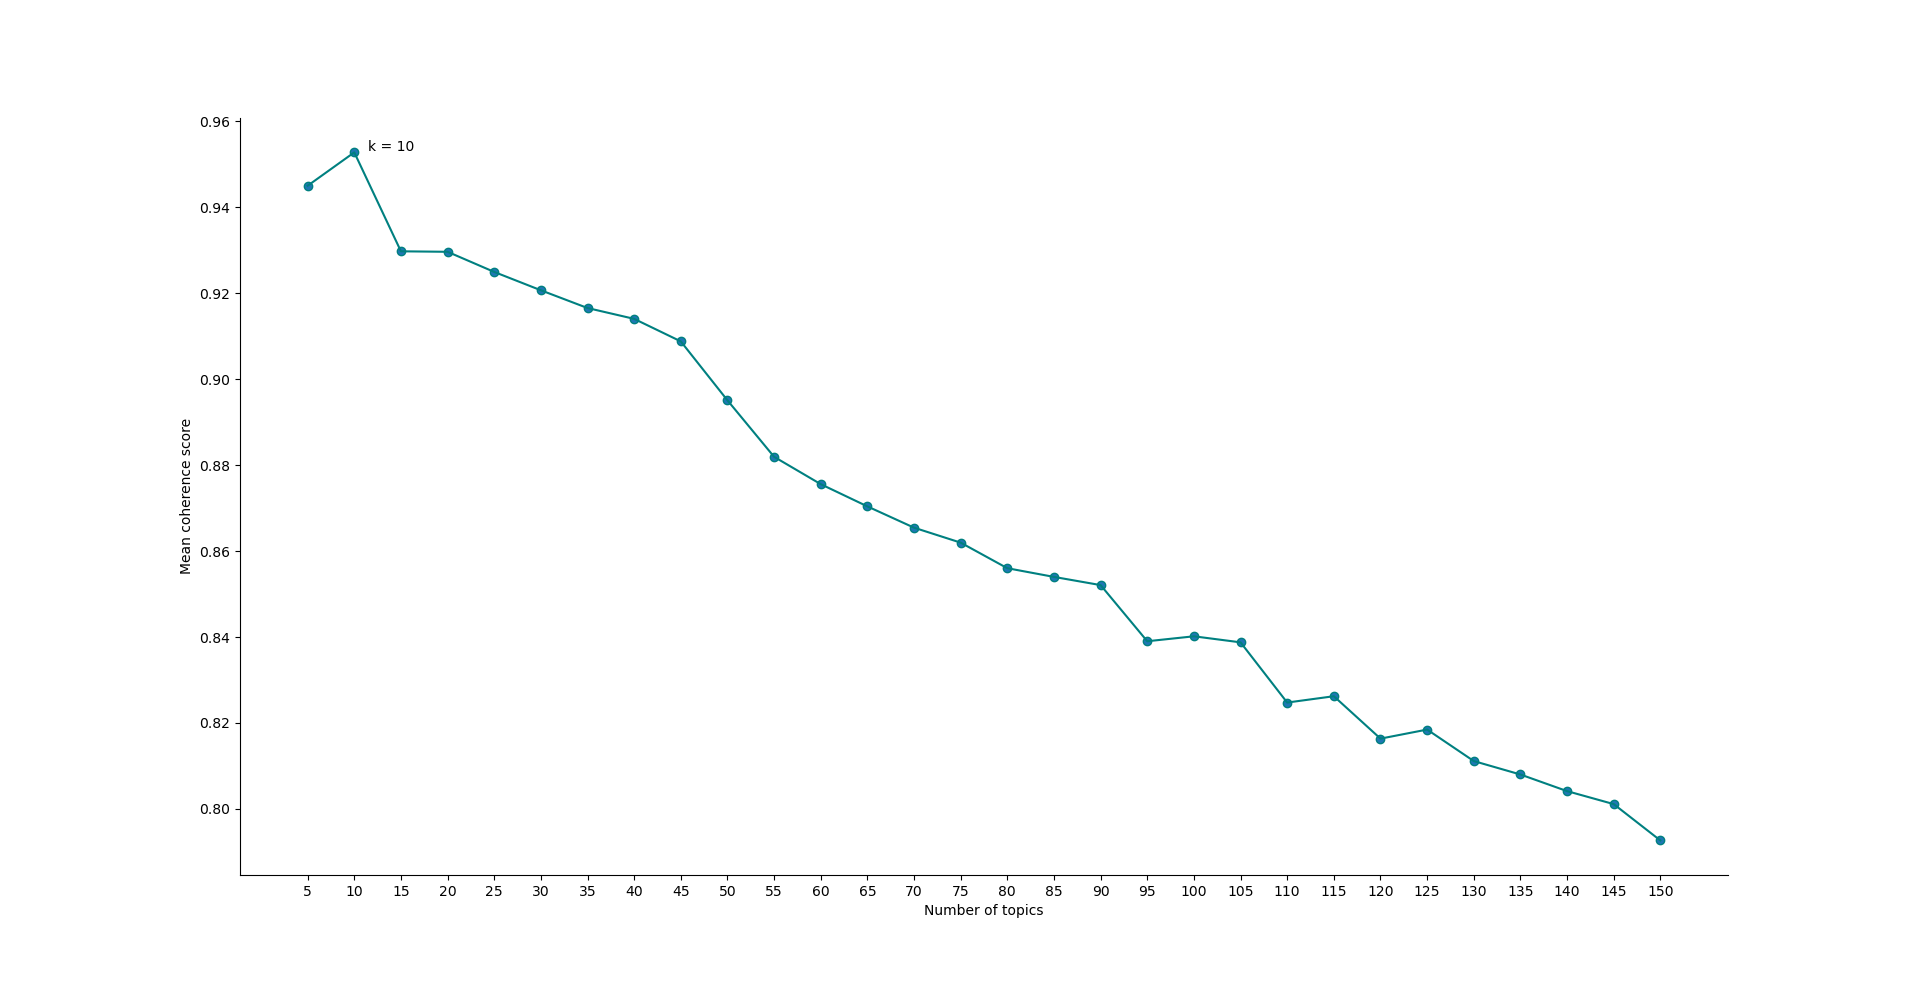

In [9]:
Image('Doc3b-Image5.png', width='75%')

And the first ten headline topics suggested by the NMF algorithm appeared to be about:

| Topic Number | Descriptor/Label |
| :----------- | :--------------- |
| 1 | Photography months |
| 2 | Covid jab |
| 3 | Covid lockdown |
| 4 | Cricket |
| 5 | Covid vaccine |
| 6 | The death of Prince Phillip |
| 7 | EU-UK trade deal |
| 8 | Australian Open |
| 9 | Coronavirus pandemic |
| 10 | Africa shot |

There was unsurprisingly a significant amount of overlap between the headline and the summary topic descriptors.

```Figure 10: Top ten keywords for the first ten headline topics produced by the NMF model```

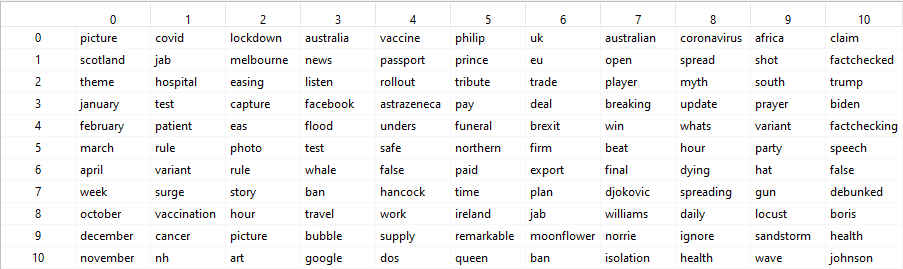

In [9]:
Image('Doc3b-Image6.png', width='75%')

### Part 5 - Code {-}

The code for this section is in Appendix B.

Total word count: 1,584 words

### References {-}

Augustyniak, L., Kajdanowicz, T., Kazienko, P., Kulisiewicz, M., & Tuliglowicz, W. (2014, 2014//). An approach to sentiment analysis of movie reviews: lexicon based vs. classification. Hybrid Artificial Intelligence Systems, Cham.

Blad, J., & Svensson, K. (2020). Exploring NMF and LDA topic models of Swedish news articles [Masters Thesis, Uppsala University]. https://www.utn.uu.se/sts/student/examensarbete/evaluating-unsupervised-topic-recognition-of-swedish-news-articles/

Chen, Y., Zhang, H., Liu, R., Ye, Z., & Lin, J. (2019). Experimental explorations on short text topic mining between LDA and NMF based schemes. Knowledge-Based Systems, 163, 1-13. https://doi.org/https://doi.org/10.1016/j.knosys.2018.08.011 

Colyer, A. (2019, February 13). Beyond news contents: the role of social context for fake news detection. The morning paper. https://blog.acolyer.org/2019/02/13/beyond-news-contents-the-role-of-social-context-for-fake-news-detection/

D'Andrea, A., Ferri, F., Grifoni, P., & Guzzo, T. (2015). Approaches, tools and applications for sentiment analysis implementation. International Journal of Computer Applications, 125, 26-33. https://doi.org/10.5120/ijca2015905866 

Dhaoui, C., Webster, C. M., & Tan, L. P. (2017). Social media sentiment analysis: lexicon versus machine learning. Journal of Consumer Marketing, 34(6), 480-488. https://doi.org/10.1108/JCM-03-2017-2141 

Godbole, N., Srinivasaiah, M., & Skiena, S. (2007). Large-scale sentiment analysis for news and blogs. Proceedings of the International Conference on Weblogs and Social Media, ICWSM 2007. https://www.icwsm.org/papers/3--Godbole-Srinivasaiah-Skiena.pdf 

Goins, J. (n.d.). 5 easy tricks to help you write catchy headlines Goins, Writer. https://goinswriter.com/catchy-headlines/

Hutto, C. J., & Gilbert, E. (2015). VADER: A parsimonious rule-based model for sentiment analysis of social media text. Proceedings of the 8th International Conference on Weblogs and Social Media, ICWSM 2014. https://www.researchgate.net/publication/275828927_VADER_A_Parsimonious_Rule-based_Model_for_Sentiment_Analysis_of_Social_Media_Text 

Klos, A. (2020, October 3). Topic modeling: LDA vs. NMF for newbies. ghost. https://alexklos.ca/blog/natural-language-processing-lda-vs-nmf-for-newbies/

Kolchyna, O., Souza, T. T. P., Treleaven, P., & Aste, T. (2015). Twitter sentiment analysis: Lexicon method, machine learning method and their combination. In G. a. Y. Mitra, X. (Ed.), Handbook of Sentiment Analysis in Finance. https://arxiv.org/abs/1507.00955 

Kuang, D., Choo, J., & Park, H. (2015). Nonnegative matrix factorization for interactive topic modeling and document clustering. In M. E. Celebi (Ed.), Partitional Clustering Algorithms (pp. 215-243). Springer International Publishing. https://doi.org/10.1007/978-3-319-09259-1_7 

Loria, S. (2020). Advanced usage: Overriding models and the blobber class. TextBlob. https://textblob.readthedocs.io/en/dev/advanced_usage.html#sentiment-analyzers

Mifrah, S., & Benlahmar, E. L. H. (2020). Topic modeling coherence: A comparative study between LDA and NMF models using COVID’19 corpus. International Journal of Advanced Trends in Computer Science and Engineering. https://doi.org/10.30534/ijatcse/2020/231942020 

O'Callaghan, D., Greene, D., Carthy, J., & Cunningham, P. (2015). An analysis of the coherence of descriptors in topic modeling. Expert Systems with Applications, 42. https://doi.org/10.1016/j.eswa.2015.02.055 

Pahwa, B., S, T., & Kasliwal, N. (2018). Sentiment analysis - strategy for text pre-processing. International Journal of Computer Applications, 180, 15-18. https://doi.org/10.5120/ijca2018916865 

Scikit-learn. (n.d.-a). 2.5. Decomposing signals in components (matrix factorization problems). https://scikit-learn.org/stable/modules/decomposition.html#nmf

Scikit-learn. (n.d.-b). sklearn.decomposition.NMF. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

Souma, W., Vodenska, I., & Aoyama, H. (2019). Enhanced news sentiment analysis using deep learning methods. Journal of Computational Social Science, 2(1), 33-46. https://doi.org/10.1007/s42001-019-00035-x 

Stafford, T. (2014, July 29). Psychology: Why bad news dominates the headlines. BBC Future. https://www.bbc.com/future/article/20140728-why-is-all-the-news-bad

Taj, S., Meghji, A., & Shaikh, B. (2019). Sentiment analysis of news articles: A lexicon based approach. 2019 International Conference on Computing, Mathematics and Engineering Technologies, iCoMET 2019. https://doi.org/10.1109/ICOMET.2019.8673428 

### Appendix A - Sentiment Analysis Code {-}

This code is also attached as a separate py file.  

In [ ]:
# import packages
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import maya
import numpy as np
import pandas as pd

# read in the data
data = pd.read_csv("Part 2 - Cleaned Data.csv", index_col=0)
data.reset_index(inplace=True, drop=True)
data['timestamp_aus'] = data.timestamp_aus.apply(lambda x: x if pd.isna(x) else maya.parse(x)
                                                 .datetime(to_timezone='Australia/Melbourne', naive=False))

# create data subset retaining only the desired features
data_sub = data[['headline', 'summary', 'category', 'webpage']]


# textblob sentiment analysis
def get_textblob_scores(dataframe, column):
    """Function to add the polarity and subjectivity scores for all possible sentiment types to the input dataframe
    given a dataframe and a text column to calculate scores for."""
    dataframe[[f'{column} polarity', f'{column} subjectivity']] = dataframe[column]. \
        apply(lambda x: pd.Series(TextBlob(x).sentiment))
    return dataframe


# get polarity and subjectivity scores for headline and summary columns
# polarity ranges between -1 and 1, where -1 is very negative and 1 is very positive
# subjectivity ranges between 0 and 1, where 0 is very objective and 1 is very subjective
textblob_sentiment = data.copy()
textblob_sentiment[['summary', 'headline2', 'summary2']] = textblob_sentiment[
    ['summary', 'headline2', 'summary2']].fillna('')

textblob_sentiment = get_textblob_scores(textblob_sentiment, 'headline')
textblob_sentiment = get_textblob_scores(textblob_sentiment, 'summary')


# replace values that should be null with -99 to avoid skewing the results of subsequent analysis
def correct_results(dataframe, column, comp_column):
    dataframe[column] = dataframe.apply(lambda x: x[column] if x[comp_column] != '' else np.nan, axis=1)
    return dataframe


textblob_sentiment = correct_results(textblob_sentiment, 'summary polarity', 'summary')
textblob_sentiment = correct_results(textblob_sentiment, 'summary subjectivity', 'summary')


# classify each headline/summary as positive, neutral or negative based on the compound score
def get_textblob_rating(dataframe, column):
    if pd.isna(dataframe[column]):
        return "N/A"
    elif dataframe[column] > 0.1:
        return 'Positive'
    elif dataframe[column] < -0.1:
        return 'Negative'
    else:
        return 'Neutral'


textblob_sentiment['headline rating'] = textblob_sentiment.apply(lambda x: get_textblob_rating(x, 'headline polarity'),
                                                                 axis=1)
textblob_sentiment['summary rating'] = textblob_sentiment.apply(lambda x: get_textblob_rating(x, 'summary polarity'),
                                                                axis=1)

# number of stories by rating (overall, by webpage, by category)
textblob_rating_counts = pd.DataFrame()
textblob_rating_counts['headline'] = textblob_sentiment['headline rating'].value_counts()
textblob_rating_counts['summary'] = textblob_sentiment['summary rating'].value_counts()

textblob_webpage_rating_counts = pd.DataFrame()
textblob_webpage_rating_counts['headline'] = textblob_sentiment.groupby(['webpage', 'headline rating']).size()
textblob_webpage_rating_counts['summary'] = textblob_sentiment.groupby(['webpage', 'summary rating']).size()
textblob_webpage_rating_counts.reset_index(inplace=True)
textblob_webpage_rating_counts.rename(columns={'headline rating': 'rating'}, inplace=True)

textblob_category_rating_counts = pd.DataFrame()
textblob_category_rating_counts['headline'] = textblob_sentiment.groupby(['category', 'headline rating']).size()
textblob_category_rating_counts['summary'] = textblob_sentiment.groupby(['category', 'summary rating']).size()
textblob_category_rating_counts.reset_index(inplace=True)
textblob_category_rating_counts.rename(columns={'headline rating': 'rating'}, inplace=True)


# standard descriptive stats
textblob_polarity_stats = pd.DataFrame()
textblob_polarity_stats['headline'] = textblob_sentiment['headline polarity'].describe()
textblob_polarity_stats['summary'] = textblob_sentiment['summary polarity'].describe()

# polarity by webpage and category
textblob_agg_polarity_by_webpage = textblob_sentiment.groupby(['webpage']).mean().reset_index()

# create copies of dataframe sorted by descending headline and summary compound sentiment score
textblob_agg_polarity_by_webpage_shd = textblob_agg_polarity_by_webpage.sort_values(by='headline polarity',
                                                                                    ascending=False)
textblob_agg_polarity_by_webpage_ssd = textblob_agg_polarity_by_webpage.sort_values(by='summary polarity',
                                                                                    ascending=False)


textblob_category_counts = textblob_sentiment.category.value_counts()
textblob_polarity_by_category = textblob_sentiment.groupby(['category']).mean().reset_index()

textblob_agg_polarity_by_category = pd.merge(textblob_category_counts, textblob_polarity_by_category,
                                             how='left',
                                             left_index=True, right_on='category')
textblob_agg_polarity_by_category.reset_index(inplace=True, drop=True)
textblob_agg_polarity_by_category.drop('category_y', axis=1, inplace=True)
textblob_agg_polarity_by_category.rename(columns={'category_x': 'num stories'}, inplace=True)

# create copies of dataframe retaining only categories with more than nine stories and sorted by descending headline
# and summary polarity
textblob_agg_polarity_by_category_gt9 = textblob_agg_polarity_by_category\
    [textblob_agg_polarity_by_category['num stories'] > 9]
textblob_agg_polarity_by_category_gt9_shd = textblob_agg_polarity_by_category_gt9.sort_values(by='headline polarity',
                                                                                              ascending=False)
textblob_agg_polarity_by_category_gt9_ssd = textblob_agg_polarity_by_category_gt9.sort_values(by='summary polarity',
                                                                                              ascending=False)

# create copies of dataframe retaining only categories with more than nine stories and sorted by ascending headline
# and summary polarity
textblob_agg_polarity_by_category_gt9_sha = textblob_agg_polarity_by_category_gt9.sort_values(by='headline polarity')
textblob_agg_polarity_by_category_gt9_ssa = textblob_agg_polarity_by_category_gt9.sort_values(by='summary polarity')

# vader sentiment analysis
# download the vader lexicon if it isn't already installed; you will need to import nltk to do so
# nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()


def get_sentiment(text, analyser, type):
    """Function to get sentiment of a particular type (positive, neutral, negative or compound) from input text."""
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[type]


def get_vader_scores(dataframe, column):
    """Function to add the sentiment scores for all possible sentiment types to the input dataframe given a dataframe
    and a text column to calculate sentiment scores for. Uses the previous get_sentiment function."""
    dataframe[f'{column} pos sent score'] = dataframe[column].apply(lambda x: x if pd.isna(x)
        else get_sentiment(x, analyser, 'pos'))
    dataframe[f'{column} neg sent score'] = dataframe[column].apply(lambda x: x if pd.isna(x)
        else get_sentiment(x, analyser, 'neg'))
    dataframe[f'{column} neu sent score'] = dataframe[column].apply(lambda x: x if pd.isna(x)
        else get_sentiment(x, analyser, 'neu'))
    dataframe[f'{column} comp sent score'] = dataframe[column].apply(lambda x: x if pd.isna(x)
        else get_sentiment(x, analyser, 'compound'))
    return dataframe


# get sentiment for headline and summary columns
vader_sentiment = data_sub.copy()
vader_sentiment = get_vader_scores(vader_sentiment, 'headline')
vader_sentiment = get_vader_scores(vader_sentiment, 'summary')


# classify each headline/summary as positive, neutral or negative based on the compound score
def get_rating(dataframe, column):
    if pd.isna(dataframe[column]):
        return "N/A"
    elif dataframe[column] > 0.05:
        return 'Positive'
    elif dataframe[column] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'


vader_sentiment['headline rating'] = vader_sentiment.apply(lambda x: get_rating(x, 'headline comp sent score'), axis=1)
vader_sentiment['summary rating'] = vader_sentiment.apply(lambda x: get_rating(x, 'summary comp sent score'), axis=1)

# number of stories by rating (overall, by webpage, by category)
vader_rating_counts = pd.DataFrame()
vader_rating_counts['headline'] = vader_sentiment['headline rating'].value_counts()
vader_rating_counts['summary'] = vader_sentiment['summary rating'].value_counts()

vader_webpage_rating_counts = pd.DataFrame()
vader_webpage_rating_counts['headline'] = vader_sentiment.groupby(['webpage', 'headline rating']).size()
vader_webpage_rating_counts['summary'] = vader_sentiment.groupby(['webpage', 'summary rating']).size()
vader_webpage_rating_counts.reset_index(inplace=True)
vader_webpage_rating_counts.rename(columns={'headline rating': 'rating'}, inplace=True)

vader_category_rating_counts = pd.DataFrame()
vader_category_rating_counts['headline'] = vader_sentiment.groupby(['category', 'headline rating']).size()
vader_category_rating_counts['summary'] = vader_sentiment.groupby(['category', 'summary rating']).size()
vader_category_rating_counts.reset_index(inplace=True)
vader_category_rating_counts.rename(columns={'headline rating': 'rating'}, inplace=True)


# standard descriptive stats
def get_descriptive_stats(dataframe, column, source_dataframe):
    """Function to calculate descriptive statistics for each sentiment score column given an output dataframe,
    column to calculate the statistics for and the source dataframe."""
    dataframe[f'{column} pos'] = source_dataframe[f'{column} pos sent score'].describe()
    dataframe[f'{column} neg'] = source_dataframe[f'{column} neg sent score'].describe()
    dataframe[f'{column} neu'] = source_dataframe[f'{column} neu sent score'].describe()
    dataframe[f'{column} comp'] = source_dataframe[f'{column} comp sent score'].describe()
    return dataframe


vader_sentiment_stats = pd.DataFrame()
vader_sentiment_stats = get_descriptive_stats(vader_sentiment_stats, 'headline', vader_sentiment)
vader_sentiment_stats = get_descriptive_stats(vader_sentiment_stats, 'summary', vader_sentiment)

# sentiment scores by webpage and category
vader_agg_sentiment_by_webpage = vader_sentiment.groupby(['webpage']).mean().reset_index()

vader_category_counts = vader_sentiment.category.value_counts()
vader_sentiment_by_category = vader_sentiment.groupby(['category']).mean().reset_index()

vader_agg_sentiment_by_category = pd.merge(vader_category_counts, vader_sentiment_by_category,
                                           how='left',
                                           left_index=True, right_on='category')
vader_agg_sentiment_by_category.reset_index(inplace=True, drop=True)
vader_agg_sentiment_by_category.drop('category_y', axis=1, inplace=True)
vader_agg_sentiment_by_category.rename(columns={'category_x': 'num stories'}, inplace=True)

# create copies of dataframe sorted by descending headline and summary compound sentiment score
vader_agg_sentiment_by_webpage_shd = vader_agg_sentiment_by_webpage.sort_values(by='headline comp sent score',
                                                                                ascending=False)
vader_agg_sentiment_by_webpage_ssd = vader_agg_sentiment_by_webpage.sort_values(by='summary comp sent score',
                                                                                ascending=False)

# create copies of dataframe retaining only categories with more than nine stories and sorted by descending headline
# and summary polarity
vader_agg_sentiment_by_category_gt9 = vader_agg_sentiment_by_category\
    [vader_agg_sentiment_by_category['num stories'] > 9]
vader_agg_sentiment_by_category_gt9_shd = vader_agg_sentiment_by_category_gt9.sort_values(by='headline comp sent score',
                                                                                          ascending=False)
vader_agg_sentiment_by_category_gt9_ssd = vader_agg_sentiment_by_category_gt9.sort_values(by='summary comp sent score',
                                                                                          ascending=False)

# create copies of dataframe retaining only categories with more than nine stories and sorted by ascending headline
# and summary polarity
vader_agg_sentiment_by_category_gt9_sha = vader_agg_sentiment_by_category_gt9.sort_values(by='headline comp sent score')
vader_agg_sentiment_by_category_gt9_ssa = vader_agg_sentiment_by_category_gt9.sort_values(by='summary comp sent score')

# visualisations
# comparison by average score
plt.rcParams.update({'font.size': 9})
vader_summary = vader_sentiment_stats.loc['mean', ['headline comp', 'summary comp']]
textblob_summary = textblob_polarity_stats.loc['mean']

fig, axs = plt.subplots(1, 2)
axs[0].bar(textblob_summary.index, textblob_summary, color='teal')
axs[0].set_xlabel('TextBlob')
axs[0].set_ylabel('Mean polarity')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[1].bar(textblob_summary.index, vader_summary, color='maroon')
axs[1].set_xlabel('VADER')
axs[1].set_ylabel('Mean compound sentiment score')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False);

# comparison by webpage
webpage_labels1 = ['In Pictures', 'Equestrian', 'Coronavirus', 'Science &\nEnvironment', 'UK', 'Entertainment\n& Arts',
                   'Australia', 'Business', 'Asia', 'Health', 'World', 'Long Reads', 'Technology', 'Reality Check']
webpage_labels2 = ['Equestrian', 'In Pictures', 'Entertainment\n& Arts', 'Coronavirus', 'Science &\nEnvironment',
                   'Business', 'Health', 'Australia', 'UK', 'Technology', 'Long Reads', 'Reality Check', 'Asia',
                   'World']
webpage_labels3 = ['In Pictures', 'Equestrian', 'Entertainment\n& Arts', 'Science &\nEnvironment', 'Health',
                   'Coronavirus', 'Technology', 'UK', 'Long Reads', 'Australia', 'Business', 'Asia', 'World',
                   'Reality Check']
webpage_labels4 = ['Equestrian', 'In Pictures', 'Entertainment\n& Arts', 'Coronavirus', 'Science &\nEnvironment',
                   'Technology', 'Business', 'Health', 'UK', 'Australia', 'Long Reads', 'Asia', 'Reality Check',
                   'World']

plt.rcParams.update({'font.size': 9})
fig, axs = plt.subplots(2, 2)
axs[0,0].bar(webpage_labels1, textblob_agg_polarity_by_webpage_shd['headline polarity'],
              color=(textblob_agg_polarity_by_webpage_shd['headline polarity'] > 0)
              .map({True: 'teal', False: 'maroon'}))
axs[0,0].set_xlabel('Webpage name')
axs[0,0].set_ylabel('Mean headline polarity')
axs[0,0].tick_params(axis='x', labelrotation=45)  # labelsize=8
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
axs[0,1].bar(webpage_labels2, vader_agg_sentiment_by_webpage_shd['headline comp sent score'],
             color=(vader_agg_sentiment_by_webpage_shd['headline comp sent score'] > 0).map({True: 'teal',
                                                                                             False: 'maroon'}))
axs[0,1].set_xlabel('Webpage name')
axs[0,1].set_ylabel('Mean headline compound sentiment')
axs[0,1].tick_params(axis='x', labelrotation=45)  # labelsize=8
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,0].bar(webpage_labels3, textblob_agg_polarity_by_webpage_ssd['summary polarity'],
             color=(textblob_agg_polarity_by_webpage_ssd['summary polarity'] > 0).map({True: 'teal', False: 'maroon'}))
axs[1,0].set_xlabel('Webpage name')
axs[1,0].set_ylabel('Mean summary polarity')
axs[1,0].tick_params(axis='x', labelrotation=45)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)
axs[1,1].bar(webpage_labels2, vader_agg_sentiment_by_webpage_ssd['summary comp sent score'],
             color=(vader_agg_sentiment_by_webpage_ssd['summary comp sent score'] > 0).map({True: 'teal',
                                                                                            False: 'maroon'}))
axs[1,1].set_xlabel('Webpage name')
axs[1,1].set_ylabel('Mean summary compound sentiment score')
axs[1,1].tick_params(axis='x', labelrotation=45)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False);
# plt.show()

# comparison by category
# bar chart of sentiment by category (for the top-30 categories by number of stories)
plt.rcParams.update({'font.size': 9})
fig, axs = plt.subplots(1, 2)
axs[0].barh(textblob_agg_polarity_by_category.category[:30],
            textblob_agg_polarity_by_category['headline polarity'][:30],
            color=(textblob_agg_polarity_by_category['headline polarity'] > 0).map({True: 'teal', False: 'maroon'}))
axs[0].invert_yaxis()
axs[0].set_xlabel('Mean headline polarity score')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[1].barh(vader_agg_sentiment_by_category.category[:30],
            vader_agg_sentiment_by_category['headline comp sent score'][:30],
            color=(vader_agg_sentiment_by_category['headline comp sent score'] > 0).map({True: 'teal',
                                                                                         False: 'maroon'}))
axs[1].invert_yaxis()
axs[1].set_xlabel('Mean headline compound sentiment score')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False);
# plt.show()

# bar chart of sentiment by category (for the top-20 most-negative and most-positive categories)
plt.rcParams.update({'font.size': 9})
fig, axs = plt.subplots(2, 2)
axs[0,0].barh(textblob_agg_polarity_by_category_gt9_sha.category[:20],
            textblob_agg_polarity_by_category_gt9_sha['headline polarity'][:20],
            color='maroon')
axs[0,0].invert_yaxis()
axs[0,0].set_xlabel('Mean headline polarity')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False);
axs[0,1].barh(vader_agg_sentiment_by_category_gt9_sha.category[:20],
            vader_agg_sentiment_by_category_gt9_sha['headline comp sent score'][:20],
            color='maroon')
axs[0,1].invert_yaxis()
axs[0,1].set_xlabel('Mean headline compound sentiment score')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[1,0].barh(textblob_agg_polarity_by_category_gt9_shd.category[:20],
            textblob_agg_polarity_by_category_gt9_shd['headline polarity'][:20],
            color='teal')
axs[1,0].invert_yaxis()
axs[1,0].set_xlabel('Mean headline polarity')
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False);
axs[1,1].barh(vader_agg_sentiment_by_category_gt9_shd.category[:20],
            vader_agg_sentiment_by_category_gt9_shd['headline comp sent score'][:20],
            color='teal')
axs[1,1].invert_yaxis()
axs[1,1].set_xlabel('Mean headline compound sentiment score')
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)
# plt.show()

### Appendix B - Topic Modelling Code {-}

This code is also attached as a separate py file.  

In [ ]:
# import packages
# general and visualisation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# pre-processing
import en_core_web_sm
import regex as re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

# NMF
import gensim
from gensim.models import CoherenceModel
from itertools import combinations
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# read in the data
data = pd.read_csv("Part 2 - Cleaned data.csv", index_col=0)

# create data subset retaining only the desired features
data_sub = data[['headline', 'summary', 'headline2', 'summary2', 'category', 'webpage']]


def preprocess_data_for_nlp(data):
    """Takes in a dataframe and processes the contents into a form suitable for nlp analysis. Output is a
    processed dataframe."""
    data = data.copy()
    bow = pd.DataFrame()

    def preprocess_text(text):
        """Takes in a text column from a dataframe and processes the contents into a bag-of-words form. That is, it
        converts words to lowercase, removes non-alphabetic words and stopwords (with the spacy stopword list) and
        lemmatises (using the Wordnet lemmatiser) applicable attributes."""
        nlp = en_core_web_sm.load()
        spacy_stopwords = nlp.Defaults.stop_words
        lemmatizer = WordNetLemmatizer()

        nona = text.fillna('')
        lower = nona.apply(lambda x: x.lower())
        punc = lower.apply(lambda x: re.sub(r'[^\w\s]', '', x))
        digits = punc.apply(lambda x: re.sub(r'[0-9]', '', x))
        letters = digits.apply(lambda x: re.sub(r'\b\w\b', '', x))
        tokens = letters.apply(lambda x: word_tokenize(x) if x != '' else x)
        stopwords = tokens.apply(lambda x: [word for word in x if word not in spacy_stopwords] if x != '' else x)
        lemmatised = stopwords.apply(lambda x: [lemmatizer.lemmatize(word) for word in x] if x != '' else x)
        strings = lemmatised.apply(lambda x: ' '.join(x) if x != '' else x)

        return strings

    bow['headline'] = preprocess_text(data.headline)
    bow['summary'] = preprocess_text(data.summary)
    bow['headline2'] = preprocess_text(data.headline2)
    bow['summary2'] = preprocess_text(data.summary2)

    bow['category'] = data['category'].apply(lambda x: x if pd.isna(x) else x.lower())
    bow.replace('', np.nan, inplace=True)

    return bow


bow = preprocess_data_for_nlp(data)

# check if any nulls in headline and/or summary columns and remove rows if true
bow_summary = bow[~pd.isna(bow.summary)]
text_summary = bow_summary.summary

# construct a document-feature matrix for the headline and summary text corpora
vectorizer = TfidfVectorizer()
feature_matrix_summary = vectorizer.fit_transform(text_summary)
terms = vectorizer.get_feature_names()

# examine the number of unique features
print(feature_matrix_summary.shape)

# convert the summaries and headlines into a form suitable for input into a word2vec model
# this only has to be done once
# credit for most of the following code must go to Derek Green (https://github.com/derekgreene/topic-model-tutorial)
text_summary_list = text_summary.to_list()
summary_tokens = [[word for word in sublist.split()] for sublist in text_summary_list]

summary_w2v_model = gensim.models.Word2Vec(sentences=summary_tokens, min_count=1, size=500, sg=1)


# define a function to calculate a simple version of the TC-W2V coherence measure for each of the trained models
def calculate_coherence(w2v_model, term_rankings):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations(term_rankings[topic_index], 2):
            pair_scores.append(w2v_model.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)


# define function to get a list of the top terms for each topic
def get_top_terms(all_terms, H, topic_index, top_n):
    top_indices = np.argsort(H[topic_index, :])[::-1]
    top_terms = []
    for term_index in top_indices[0:top_n]:
        top_terms.append(all_terms[term_index])
    return top_terms

# define a range of topics and hyperparameters to assess
summary_kmin = 5
summary_kmax = 100
summary_step = 10

p_alpha = [0, 0.2, 0.4]
l1_ratio = [0, 0.2, 0.5, 0.7]

# build nmf models for each of these values for the summary corpus
summary_nmf_models = []
for k in range(summary_kmin, summary_kmax+1, summary_step):
    for alpha in p_alpha:
        for ratio in l1_ratio:
            print("Applying NMF to the summary text for k = {}, alpha = {}, ratio = {}...".format(k, alpha, ratio))
            model = NMF(n_components=k, init = 'nndsvd', alpha = alpha, l1_ratio=ratio, random_state=2021)
            W = model.fit_transform(feature_matrix_summary)
            H = model.components_
            summary_nmf_models.append((k, W, H, alpha, ratio))

# process each of the models for the different values of k
summary_results = []
for (k, W, H, alpha, ratio) in summary_nmf_models:
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append(get_top_terms(terms, H, topic_index, 20))
    summary_results.append({
        'k': k,
        'alpha': alpha,
        'ratio': ratio,
        'coherence': calculate_coherence(summary_w2v_model, term_rankings)
    })

summary_results = pd.DataFrame(summary_results)
summary_results_s = summary_results.sort_values(by=['alpha','ratio'])
summary_results_s.reset_index(inplace=True, drop=True)

# create the line plot
ax1 = plt.plot(summary_results_s['k'][:9], summary_results_s['coherence'][:9], linestyle = '--')
ax2 = plt.plot(summary_results_s['k'][:9], summary_results_s['coherence'][40:49])
ax3 = plt.plot(summary_results_s['k'][:9], summary_results_s['coherence'][50:59])
ax4 = plt.plot(summary_results_s['k'][:9], summary_results_s['coherence'][60:69])
ax5 = plt.plot(summary_results_s['k'][:9], summary_results_s['coherence'][70:79])
ax6 = plt.plot(summary_results_s['k'][:9], summary_results_s['coherence'][80:89])
ax7 = plt.plot(summary_results_s['k'][:9], summary_results_s['coherence'][90:99])
ax8 = plt.plot(summary_results_s['k'][:9], summary_results_s['coherence'][100:109])
ax9 = plt.plot(summary_results_s['k'][:9], summary_results_s['coherence'][110:119])
plt.xticks(summary_results_s['k'][:9])
plt.xlabel("Number of topics")
plt.ylabel("Mean coherence score")

# determine the best number of topics for the tuned hyperparameters
summary_kmin = 5
summary_kmax = 150
summary_step = 5

summary_nmf_models = []
for k in range(summary_kmin, summary_kmax+1, summary_step):
    print("Applying NMF to the summary text for k = {}.".format(k))
    model = NMF(n_components=k, init = 'nndsvd', alpha = 0.4, l1_ratio=0, random_state=2021)
    W = model.fit_transform(feature_matrix_summary)
    H = model.components_
    summary_nmf_models.append((k, W, H))

# process each of the models for the different values of k
summary_k_values = []
summary_coherences = []
for (k, W, H) in summary_nmf_models:
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append(get_top_terms(terms, H, topic_index, 20))
    summary_k_values.append(k)
    summary_coherences.append(calculate_coherence(summary_w2v_model, term_rankings))
    print("Corpus = 'summaries', K = %02d: Coherence = %.4f" % (k, summary_coherences[-1]))

plt.plot(summary_k_values, summary_coherences, color='teal')
plt.xticks(summary_k_values)
plt.xlabel("Number of topics")
plt.ylabel("Mean coherence score")
plt.scatter(summary_k_values, summary_coherences, edgecolors='teal')
ymax = max(summary_coherences)
xpos = summary_coherences.index(ymax)
best_k = summary_k_values[xpos]
plt.annotate("k = %d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points")

for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

k = 70
W = summary_nmf_models[13][1]
H = summary_nmf_models[13][2]

topics_and_terms = []
for topic_index in range(k):
    top_terms = get_top_terms(terms, H, topic_index, 20)
    str_term = ', '.join(top_terms)
    topics_and_terms.append({'topic': topic_index, 'top terms': str_term})

topics_and_terms = pd.DataFrame(topics_and_terms)
topics_and_terms = topics_and_terms['top terms'].str.split(', ', expand=True).transpose()

# examine which summaries have the strongest link to each topic to help determine labels
nmf_embedding = W
nmf_embedding = (nmf_embedding - nmf_embedding.mean(axis=0)) / nmf_embedding.std(axis=0)

top_idx = pd.DataFrame(np.argsort(nmf_embedding, axis=0)[-20:])

topic_num = []
topic_indexes = []
summary_text = []
all_summary_text = []
for (colname, coldata) in top_idx.iteritems():
    number = colname
    indexes = coldata.values
    topic_num.append(number)
    topic_indexes.append(indexes)
    all_summary_text.append(summary_text)
    summary_text = []
    for idx in indexes:
        text = bow_summary.iloc[idx]['summary']
        summary_text.append(text)

all_summary_text_s = pd.Series(all_summary_text)
all_summary_text_s = all_summary_text_s[1:]

all_summary_text_s2 = all_summary_text_s.apply(pd.Series)
topics_and_summaries = all_summary_text_s2.transpose()
topics_and_summaries = topics_and_summaries.T.reset_index(drop=True).T

# initial ideas for topic labels for first 10 topics
# some topics appear multiple times so may want to re-examine and reduce cluster sizes or adjust hyperparameters
topic_labels = ['Topic 1: photography', 'Topic 2: photography months', 'Topic 3: health', 'Topic 4: cricket',
                'Topic 5: vaccinating the young', 'Topic 6: the year...', 'Topic 7: covid recovery',
                'Topic 8: photography reader theme', 'Topic 9: covid lockdown easing', 'Topic 10: Australian Open']

# repeat the same process as above but for the headlines
# check if any nulls in headline and/or summary columns and remove rows if true
bow_headline = bow[~pd.isna(bow.headline)]
text_headline = bow_headline.headline

# construct a document-feature matrix for the headline and summary text corpora
vectorizer = TfidfVectorizer()
feature_matrix_headline = vectorizer.fit_transform(text_headline)
terms = vectorizer.get_feature_names()

# examine the number of unique features
print(feature_matrix_headline.shape)

# convert the summaries and headlines into a form suitable for input into a word2vec model
# this only has to be done once
text_headline_list = text_headline.to_list()
headline_tokens = [[word for word in sublist.split()] for sublist in text_headline_list]

headline_w2v_model = gensim.models.Word2Vec(sentences=headline_tokens, min_count=1, size=500, sg=1)

# define a range of topics and hyperparameters to assess
headline_kmin = 5
headline_kmax = 100
headline_step = 10

p_alpha = [0, 0.2, 0.4]
l1_ratio = [0, 0.2, 0.5, 0.7]

# build nmf models for each of these values for the headline corpus
headline_nmf_models = []
for k in range(headline_kmin, headline_kmax+1, headline_step):
    for alpha in p_alpha:
        for ratio in l1_ratio:
            print("Applying NMF to the headline text for k = {}, alpha = {}, ratio = {}...".format(k, alpha, ratio))
            model = NMF(n_components=k, init = 'nndsvd', alpha = alpha, l1_ratio=ratio, random_state=2021)
            W = model.fit_transform(feature_matrix_headline)
            H = model.components_
            headline_nmf_models.append((k, W, H, alpha, ratio))

# process each of the models for the different values of k
headline_results = []
for (k, W, H, alpha, ratio) in headline_nmf_models:
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append(get_top_terms(terms, H, topic_index, 20))
    headline_results.append({
        'k': k,
        'alpha': alpha,
        'ratio': ratio,
        'coherence': calculate_coherence(headline_w2v_model, term_rankings)
    })

headline_results = pd.DataFrame(headline_results)
headline_results_s = headline_results.sort_values(by=['alpha','ratio'])
headline_results_s.reset_index(inplace=True, drop=True)

# create the line plot
ax1 = plt.plot(headline_results_s['k'][:9], headline_results_s['coherence'][:9], linestyle = '--')
ax2 = plt.plot(headline_results_s['k'][:9], headline_results_s['coherence'][40:49])
ax3 = plt.plot(headline_results_s['k'][:9], headline_results_s['coherence'][50:59])
ax4 = plt.plot(headline_results_s['k'][:9], headline_results_s['coherence'][60:69])
ax5 = plt.plot(headline_results_s['k'][:9], headline_results_s['coherence'][70:79])
ax6 = plt.plot(headline_results_s['k'][:9], headline_results_s['coherence'][80:89])
ax7 = plt.plot(headline_results_s['k'][:9], headline_results_s['coherence'][90:99])
ax8 = plt.plot(headline_results_s['k'][:9], headline_results_s['coherence'][100:109])
ax9 = plt.plot(headline_results_s['k'][:9], headline_results_s['coherence'][110:119])
plt.xticks(headline_results_s['k'][:9])
plt.xlabel("Number of topics")
plt.ylabel("Mean coherence score")

# determine the best number of topics for the tuned hyperparameters
headline_kmin = 5
headline_kmax = 150
headline_step = 5

headline_nmf_models = []
for k in range(headline_kmin, headline_kmax+1, headline_step):
    print("Applying NMF to the headline text for k = {}.".format(k))
    model = NMF(n_components=k, init = 'nndsvd', alpha = 0.4, l1_ratio=0, random_state=2021)
    W = model.fit_transform(feature_matrix_headline)
    H = model.components_
    headline_nmf_models.append((k, W, H))

# process each of the models for the different values of k
headline_k_values = []
headline_coherences = []
for (k, W, H) in headline_nmf_models:
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append(get_top_terms(terms, H, topic_index, 20))
    headline_k_values.append(k)
    headline_coherences.append(calculate_coherence(headline_w2v_model, term_rankings))
    print("Corpus = 'summaries', K = %02d: Coherence = %.4f" % (k, headline_coherences[-1]))

plt.plot(headline_k_values, headline_coherences, color='teal')
plt.xticks(headline_k_values)
plt.xlabel("Number of topics")
plt.ylabel("Mean coherence score")
plt.scatter(headline_k_values, headline_coherences, edgecolors='teal')
ymax = max(headline_coherences)
xpos = headline_coherences.index(ymax)
best_k = headline_k_values[xpos]
plt.annotate("k = %d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points")

for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

k = 10
W = headline_nmf_models[1][1]
H = headline_nmf_models[1][2]

topics_and_terms = []
for topic_index in range(k):
    top_terms = get_top_terms(terms, H, topic_index, 20)
    str_term = ', '.join(top_terms)
    topics_and_terms.append({'topic': topic_index, 'top terms': str_term})

topics_and_terms = pd.DataFrame(topics_and_terms)
topics_and_terms = topics_and_terms['top terms'].str.split(', ', expand=True).transpose()

# examine which summaries have the strongest link to each topic to help determine labels
nmf_embedding = W
nmf_embedding = (nmf_embedding - nmf_embedding.mean(axis=0)) / nmf_embedding.std(axis=0)

top_idx = pd.DataFrame(np.argsort(nmf_embedding, axis=0)[-20:])

topic_num = []
topic_indexes = []
headline_text = []
all_headline_text = []
for (colname, coldata) in top_idx.iteritems():
    number = colname
    indexes = coldata.values
    topic_num.append(number)
    topic_indexes.append(indexes)
    all_headline_text.append(headline_text)
    headline_text = []
    for idx in indexes:
        text = bow_headline.iloc[idx]['headline']
        headline_text.append(text)

all_headline_text_s = pd.Series(all_headline_text)
all_headline_text_s = all_headline_text_s[1:]

all_headline_text_s2 = all_headline_text_s.apply(pd.Series)
topics_and_headlines = all_headline_text_s2.transpose()
topics_and_headlines = topics_and_headlines.T.reset_index(drop=True).T

# initial ideas for topic labels for first 10 topics
# some topics appear multiple times so may want to re-examine and reduce cluster sizes or adjust hyperparameters
headline_topic_labels = ['Topic 1: photography months', 'Topic 2: covid jab', 'Topic 3: covid lockdown',
                         'Topic 4: cricket', 'Topic 5: covid vaccine', 'Topic 6: Prince Phillip death',
                         'Topic 7: UK-EU trade deal', 'Topic 8: Australian Open', 'Topic 9: coronavirus pandemic',
                         'Topic 10: Africa shot']